# Machine Learning Module Assignment - Credit Card Fraud Detection

- About this file
- Training set for Credit Card Transactions
- index - Unique Identifier for each row
- trans_date_trans_time - Transaction DateTime
- cc_num - Credit Card Number of Customer
- merchant - Merchant Name
- category - Category of Merchant
- amt - Amount of Transaction
- first - First Name of Credit Card Holder
- last - Last Name of Credit Card Holder
- gender - Gender of Credit Card Holder
- street - Street Address of Credit Card Holder
- city - City of Credit Card Holder
- state - State of Credit Card Holder
- zip - Zip of Credit Card Holder
- lat - Latitude Location of Credit Card Holder
- long - Longitude Location of Credit Card Holder
- city_pop - Credit Card Holder's City Population
- job - Job of Credit Card Holder
- dob - Date of Birth of Credit Card Holder
- trans_num - Transaction Number
- unix_time - UNIX Time of transaction
- merch_lat - Latitude Location of Merchant
- merch_long - Longitude Location of Merchant
- is_fraud - Fraud Flag <--- Target Class

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('dark_background')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Reading the training and testing datasets
train = pd.read_csv('fraudTrain.csv')
test = pd.read_csv('fraudTest.csv')

In [3]:
df = pd.concat([train, test], axis = 0)
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [4]:
df.reset_index(drop = True, inplace = True)

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [10]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [11]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [12]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df['day'] = df['trans_date_trans_time'].dt.day

In [13]:
df.nunique()

trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
year                           2
month                         12
day                           31
dtype: int64

In [14]:
print('Unique Values from some Categorical columns')
print('\nCategory : ', df['category'].unique())
print('\nGender   : ', df['gender'].unique())
print('\nState    : ', df['state'].unique())
print('\nIs Fraud : ', df['is_fraud'].unique())
print('\nYear     : ', df['year'].unique())
print('\nMonth    : ', df['month'].unique())

Unique Values from some Categorical columns

Category :  ['misc_net' 'grocery_pos' 'entertainment' 'gas_transport' 'misc_pos'
 'grocery_net' 'shopping_net' 'shopping_pos' 'food_dining' 'personal_care'
 'health_fitness' 'travel' 'kids_pets' 'home']

Gender   :  ['F' 'M']

State    :  ['NC' 'WA' 'ID' 'MT' 'VA' 'PA' 'KS' 'TN' 'IA' 'WV' 'FL' 'CA' 'NM' 'NJ'
 'OK' 'IN' 'MA' 'TX' 'WI' 'MI' 'WY' 'HI' 'NE' 'OR' 'LA' 'DC' 'KY' 'NY'
 'MS' 'UT' 'AL' 'AR' 'MD' 'GA' 'ME' 'AZ' 'MN' 'OH' 'CO' 'VT' 'MO' 'SC'
 'NV' 'IL' 'NH' 'SD' 'AK' 'ND' 'CT' 'RI' 'DE']

Is Fraud :  [0 1]

Year     :  [2019 2020]

Month    :  [ 1  2  3  4  5  6  7  8  9 10 11 12]


In [15]:
df['dob'] = pd.to_datetime(df['dob'])

In [16]:
df['trans_date_trans_time'] = df['trans_date_trans_time'].apply(str)
df[['trans_date', 'trans_time']] = df['trans_date_trans_time'].str.split(' ', expand = True)

In [17]:
df['trans_date'] = pd.to_datetime(df['trans_date'])
df['current_year'] = df['trans_date'].dt.year.max()
df['customer_age'] = df['current_year'] - df['dob'].dt.year
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,year,month,day,trans_date,trans_time,current_year,customer_age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019,1,1,2019-01-01,00:00:18,2020,32
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019,1,1,2019-01-01,00:00:44,2020,42
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019,1,1,2019-01-01,00:00:51,2020,58
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019,1,1,2019-01-01,00:01:16,2020,53
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019,1,1,2019-01-01,00:03:06,2020,34


In [18]:
df.drop(['trans_date_trans_time', 'cc_num', 'trans_num', 'unix_time', 'dob', 'trans_time', 'current_year'], axis = 1, inplace = True)

## Exploratory Data Analysis

In [19]:
df['is_fraud'].value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

In [20]:
# resetting rc dictionary parameters to default
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use('ggplot')

<Axes: >

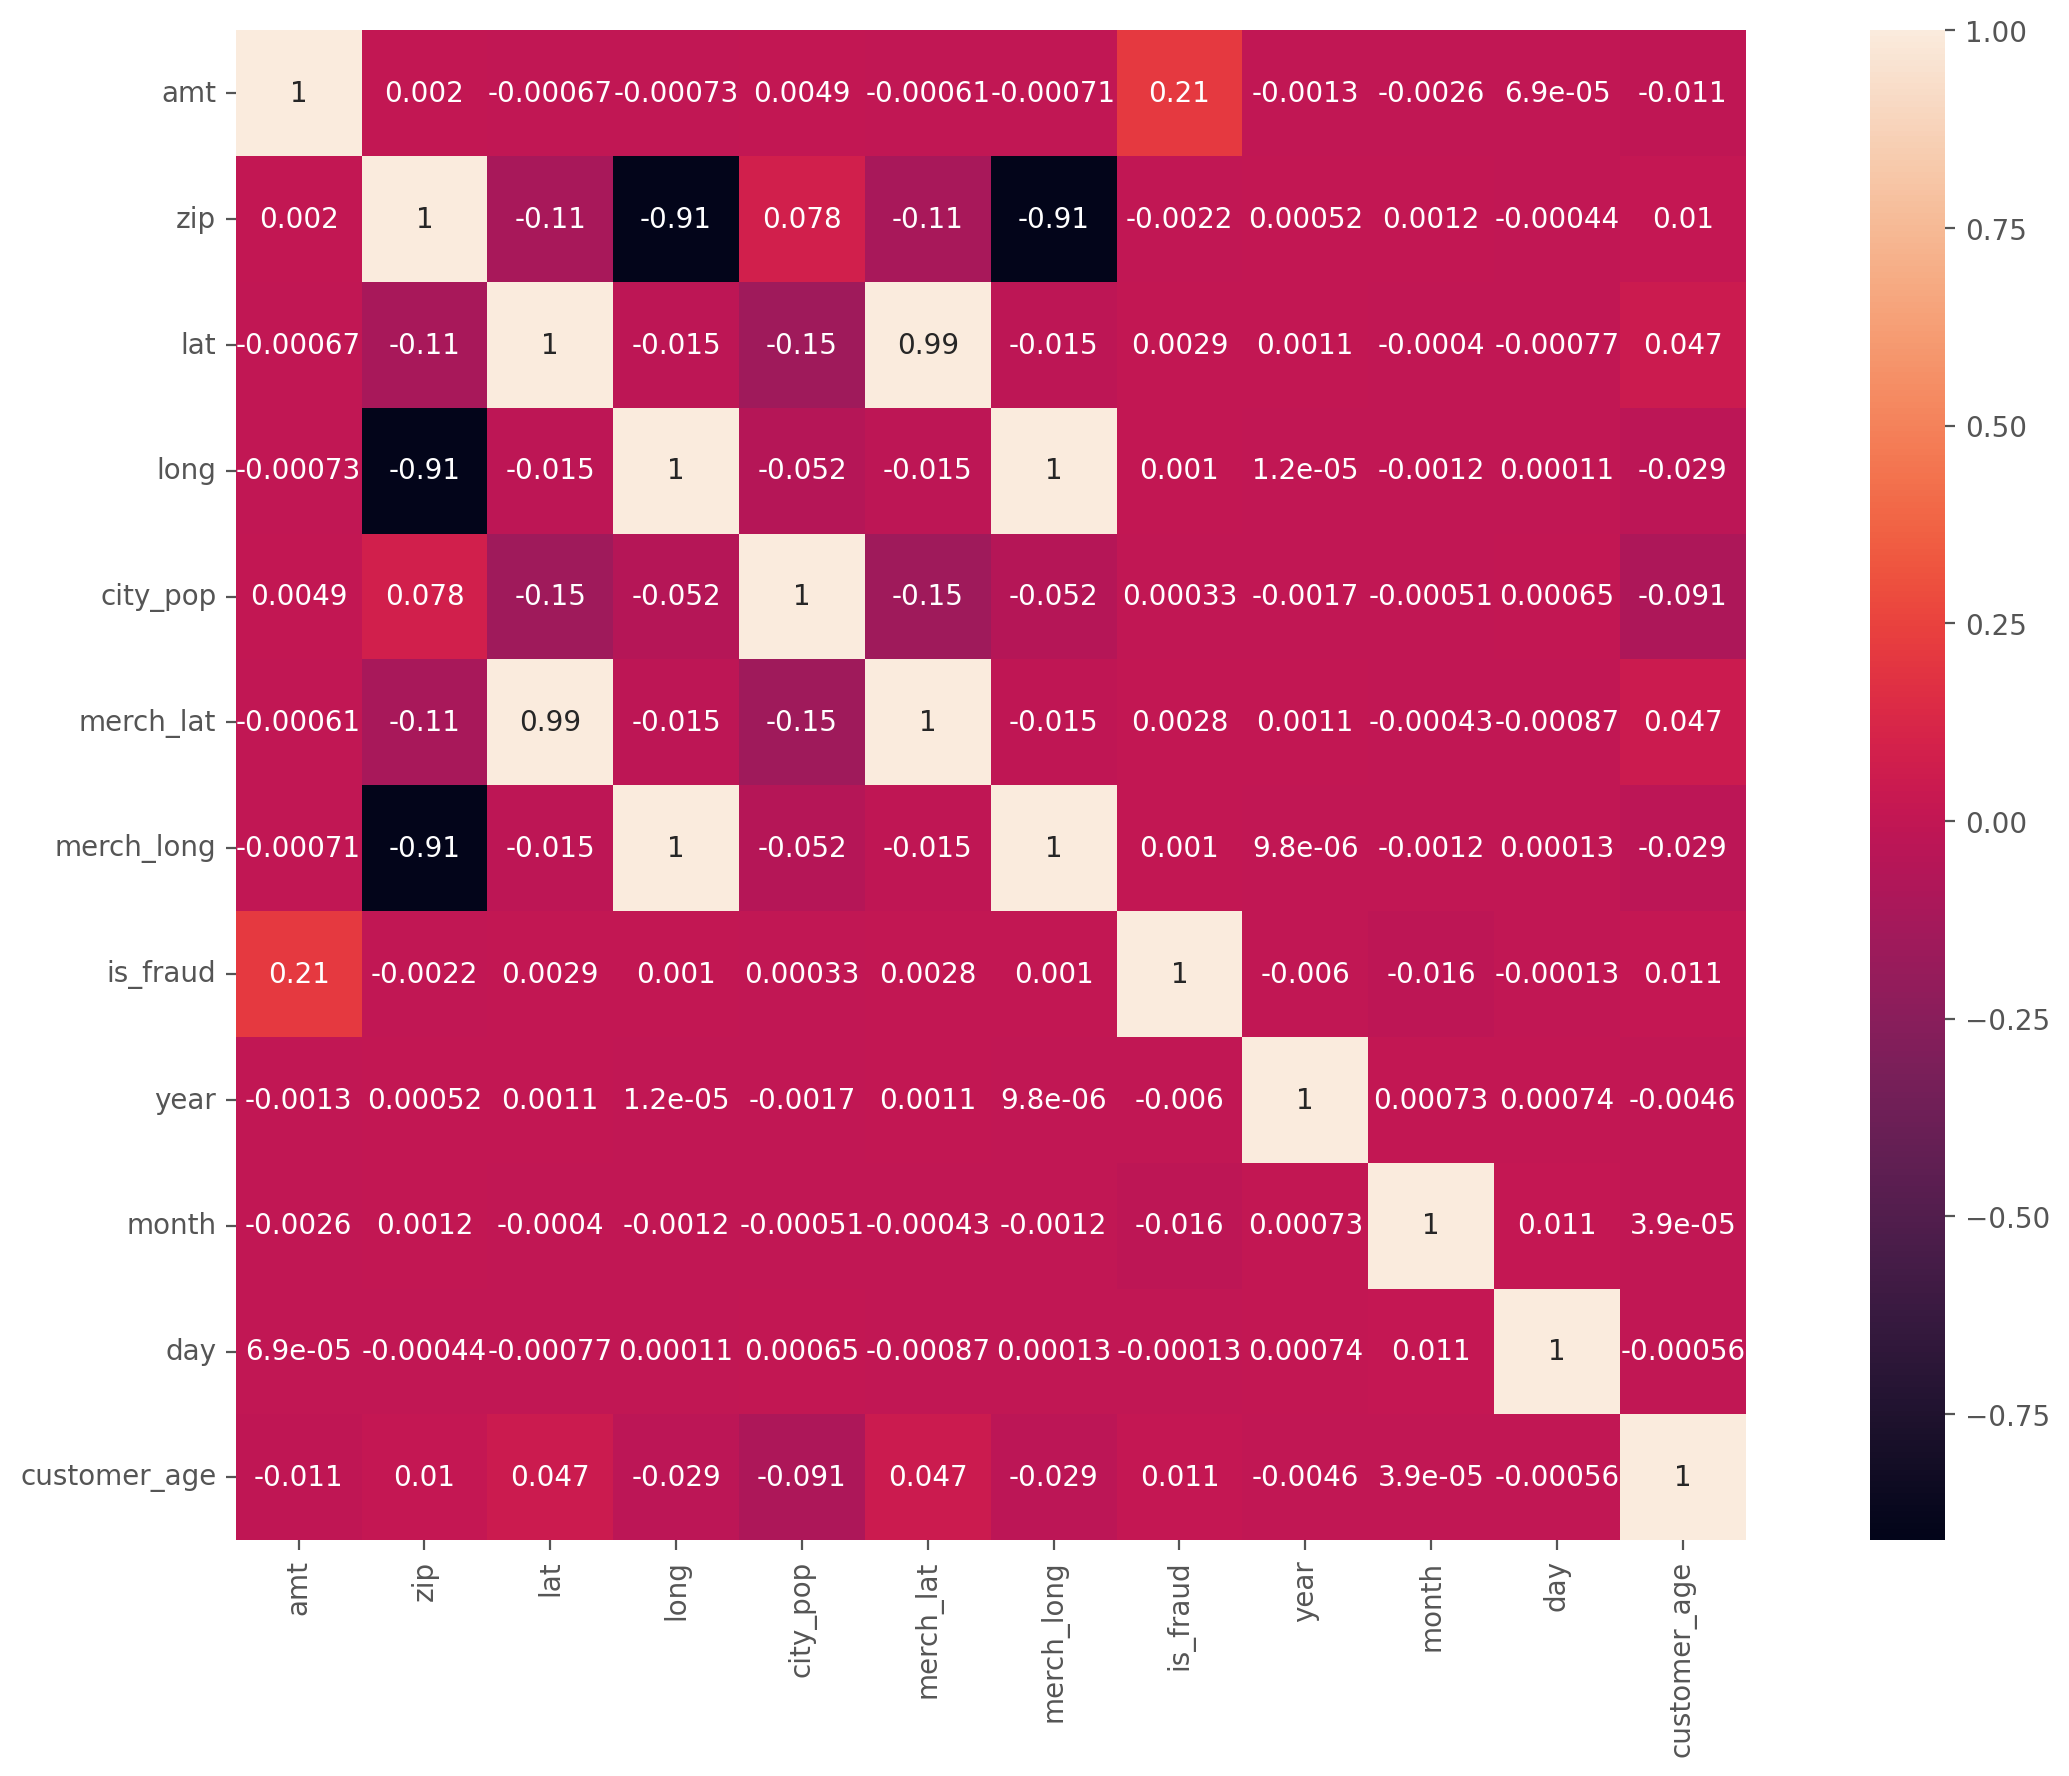

In [21]:
plt.figure(figsize = (16, 10), dpi = 200)
sns.heatmap(df.corr(), annot = True, square = True)

0    1842743
1       9651
Name: is_fraud, dtype: int64


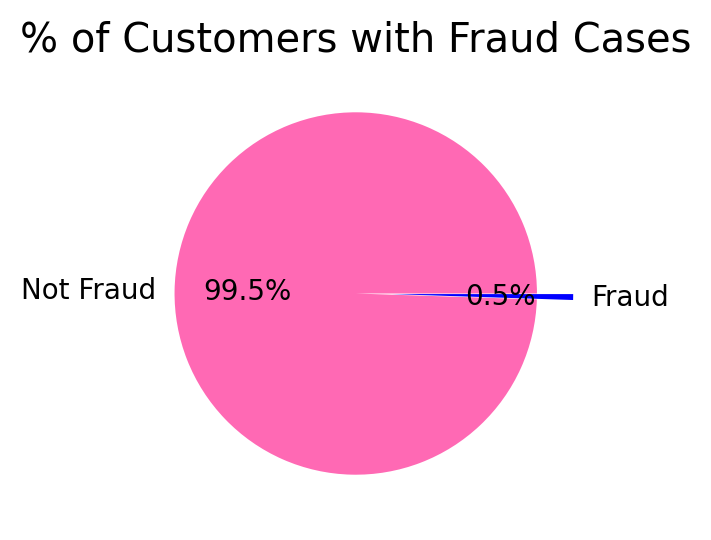

In [22]:
fraud_customers = df['is_fraud'].value_counts()
print(fraud_customers)
plt.figure(figsize = (8,3), dpi = 200)
plt.pie(fraud_customers.values, labels = ['Not Fraud', 'Fraud'], autopct = '%.1f%%', data = fraud_customers,
        explode = [0, 0.2], colors = ['hotpink', 'blue'])
plt.title('% of Customers with Fraud Cases')
plt.show()

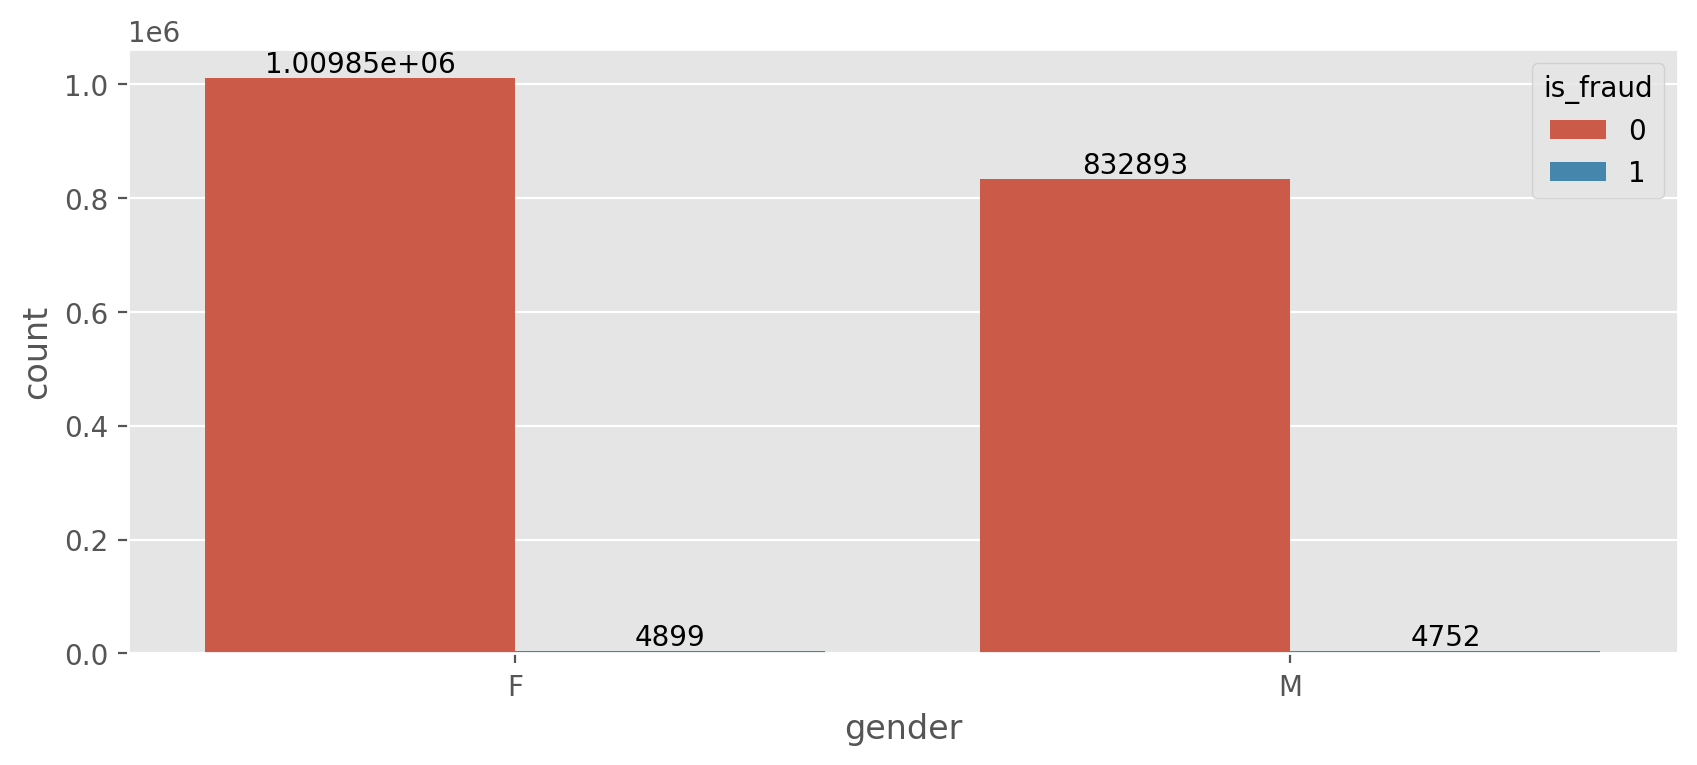

In [23]:
# Fraud by Gender
plt.figure(figsize = (10, 4), dpi = 200)
ax = sns.countplot('gender', hue = 'is_fraud', data = df)
for i in ax.containers:
    ax.bar_label(i)

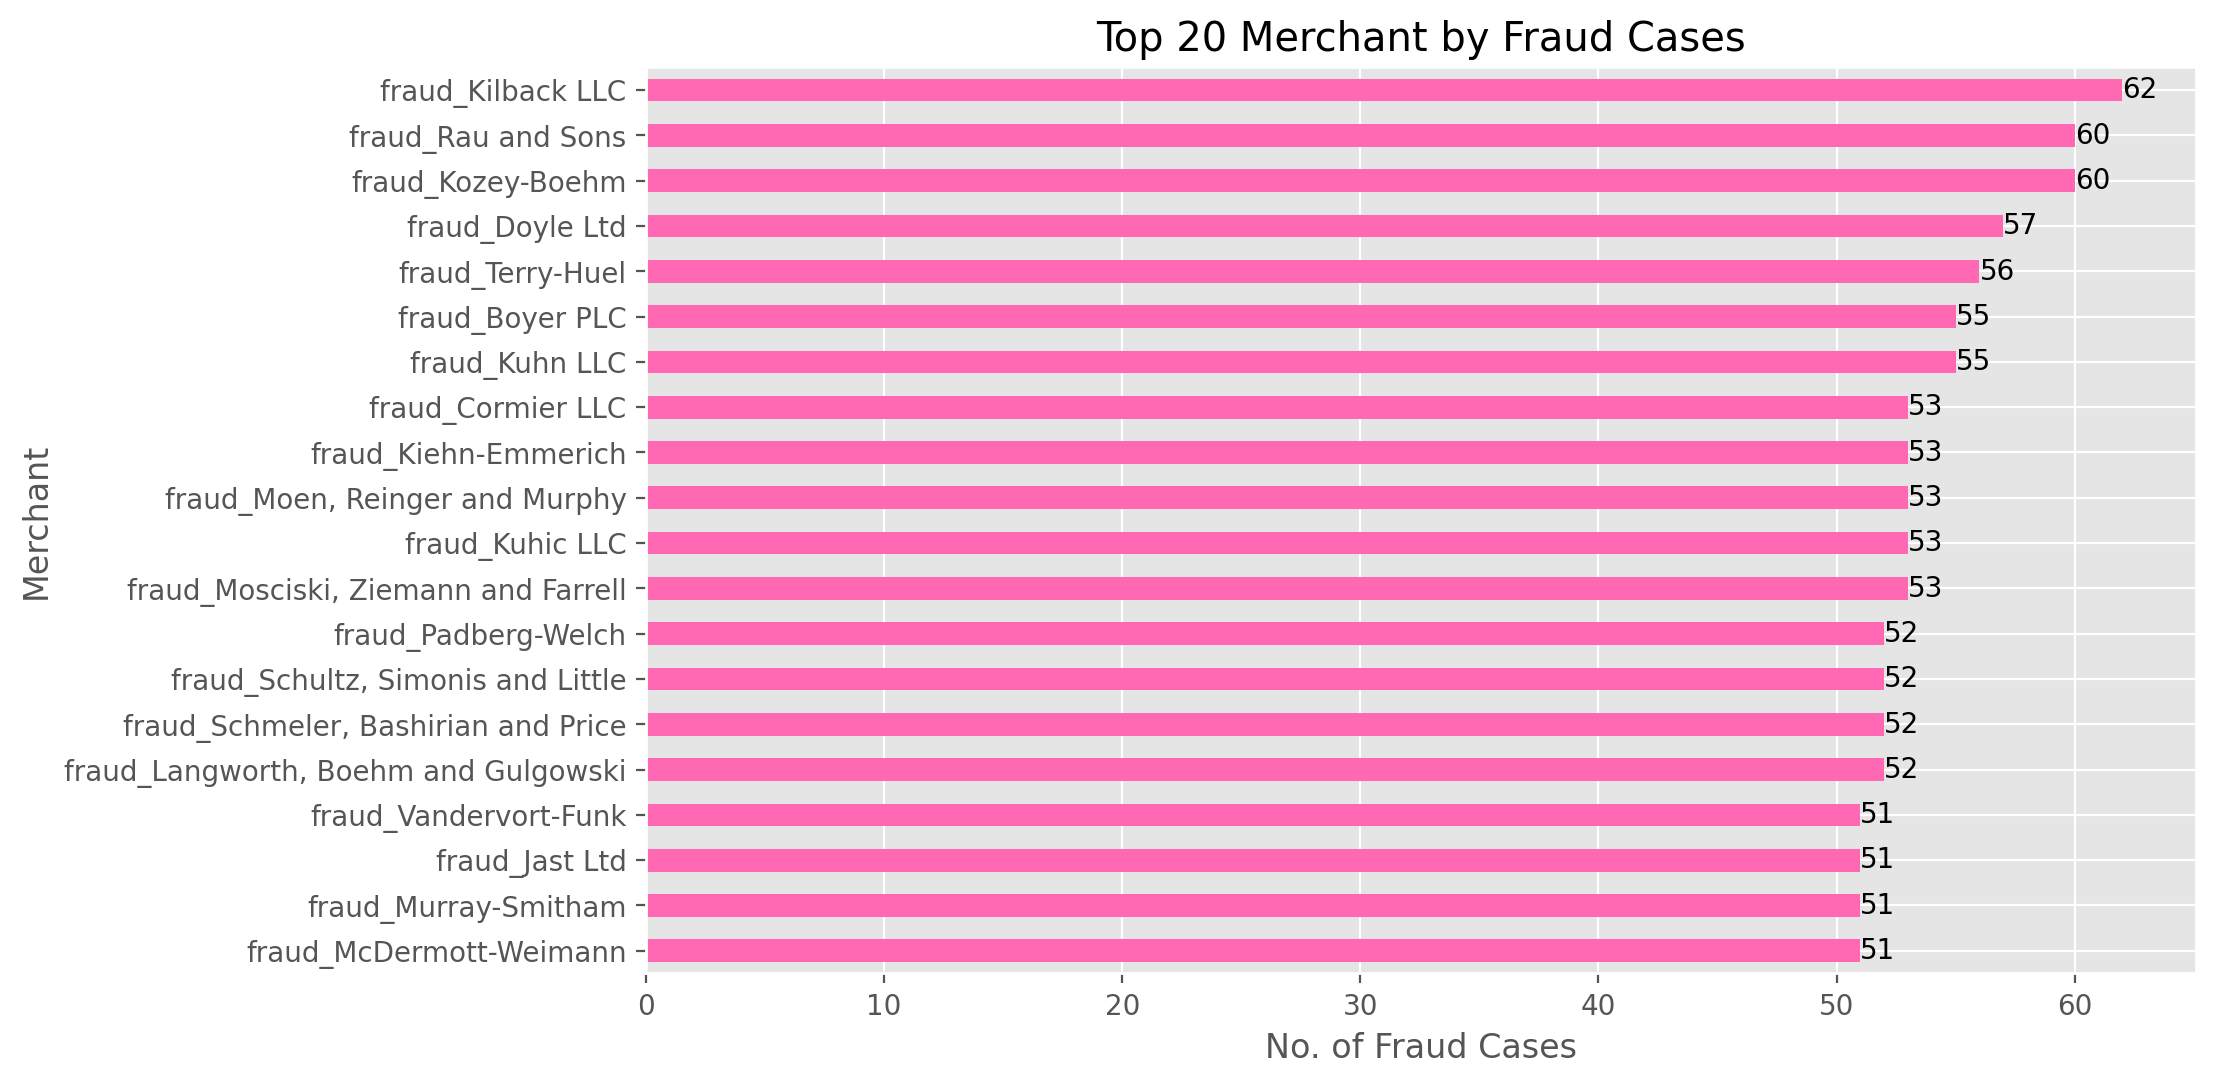

In [24]:
# Fraud by merchant(top 20)
fraud_by_merchant = df[df['is_fraud'] == 1]['merchant'].value_counts()[:20].sort_values()

plt.figure(figsize = (10,6), dpi = 200)
ax = fraud_by_merchant.plot(kind = 'barh', xlabel = 'No. of Fraud Cases', ylabel = 'Merchant',
                            title = 'Top 20 Merchant by Fraud Cases', color = 'hotpink')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

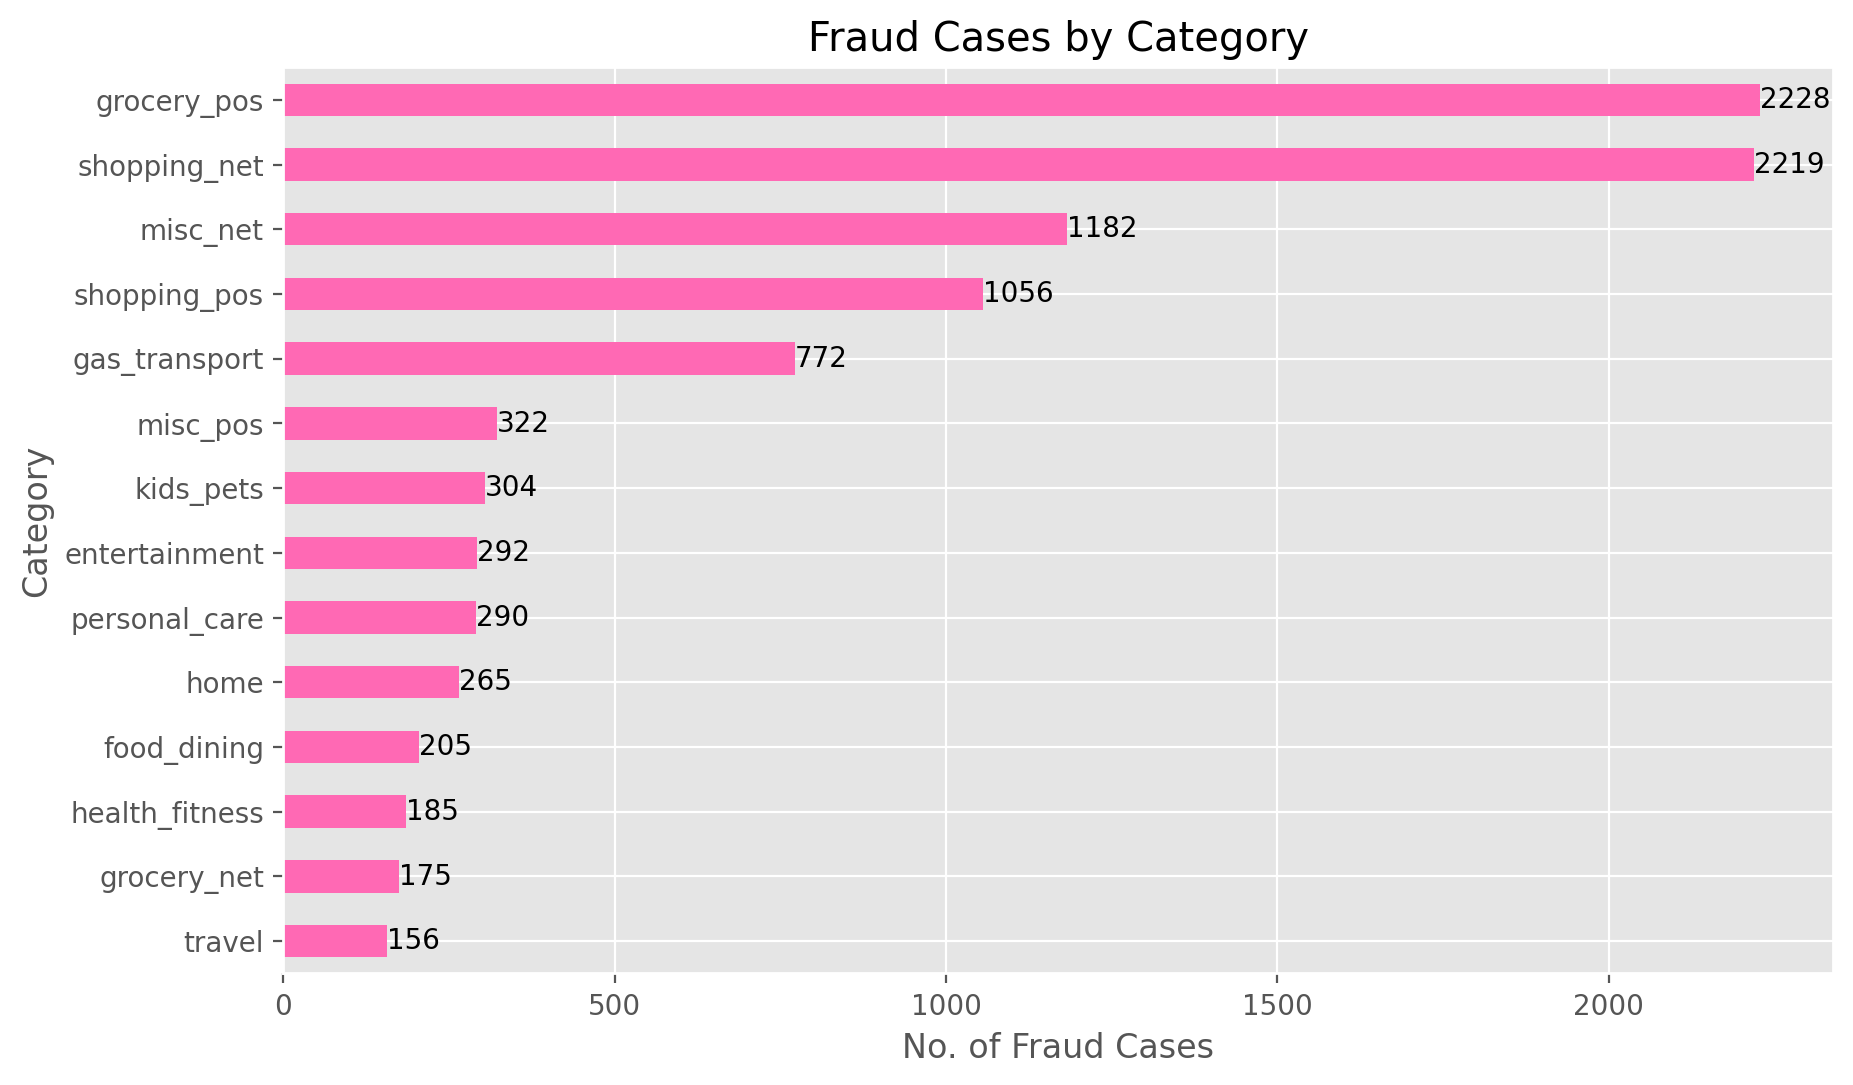

In [25]:
# Fraud by Category
fraud_by_category = df[df['is_fraud'] == 1]['category'].value_counts().sort_values()
fraud_by_category

plt.figure(figsize = (10,6),dpi = 200)
ax = fraud_by_category.plot(kind = 'barh', xlabel = 'No. of Fraud Cases', ylabel = 'Category',
                            title = 'Fraud Cases by Category', color = 'hotpink')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

<Axes: xlabel='is_fraud', ylabel='amt'>

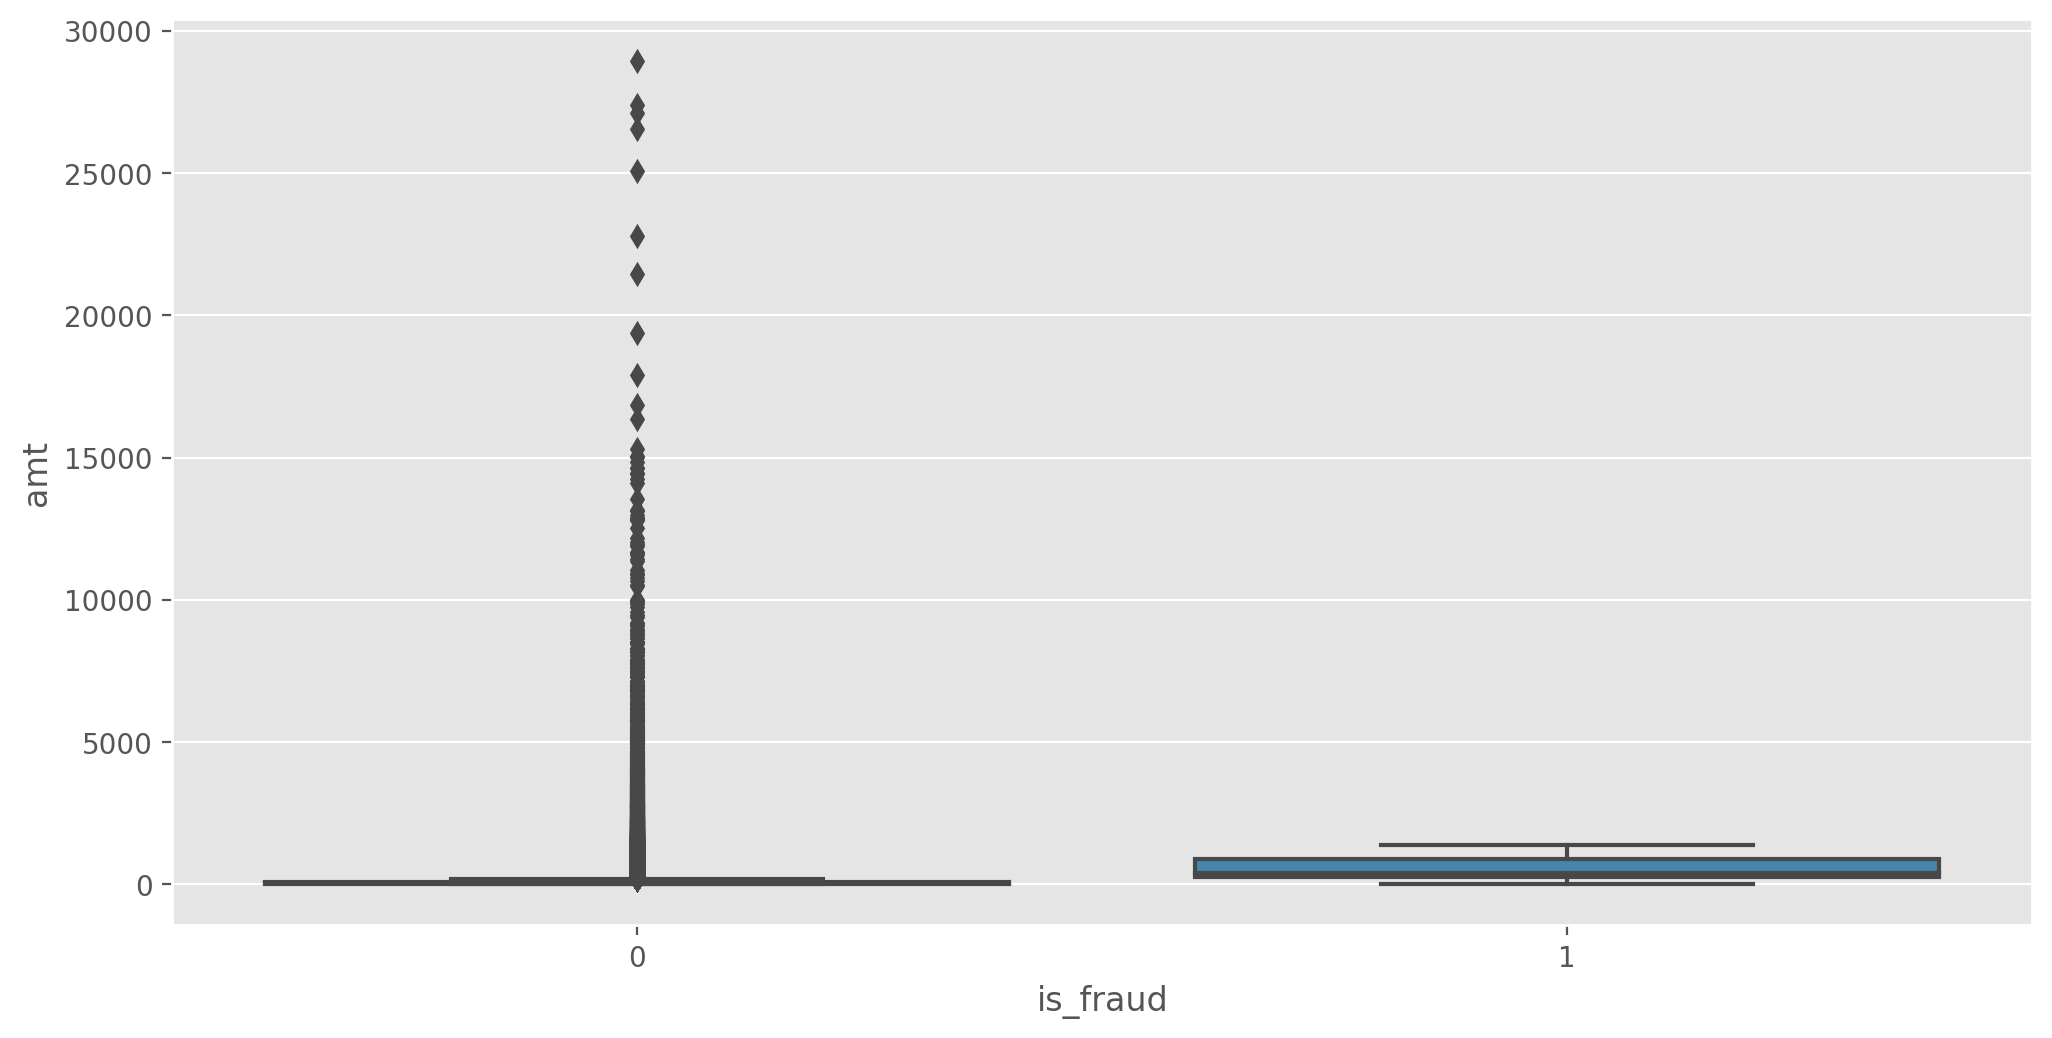

In [26]:
# Fraud by Amount
plt.figure(figsize = (12, 6), dpi = 200)
sns.boxplot('is_fraud', 'amt', data = df)

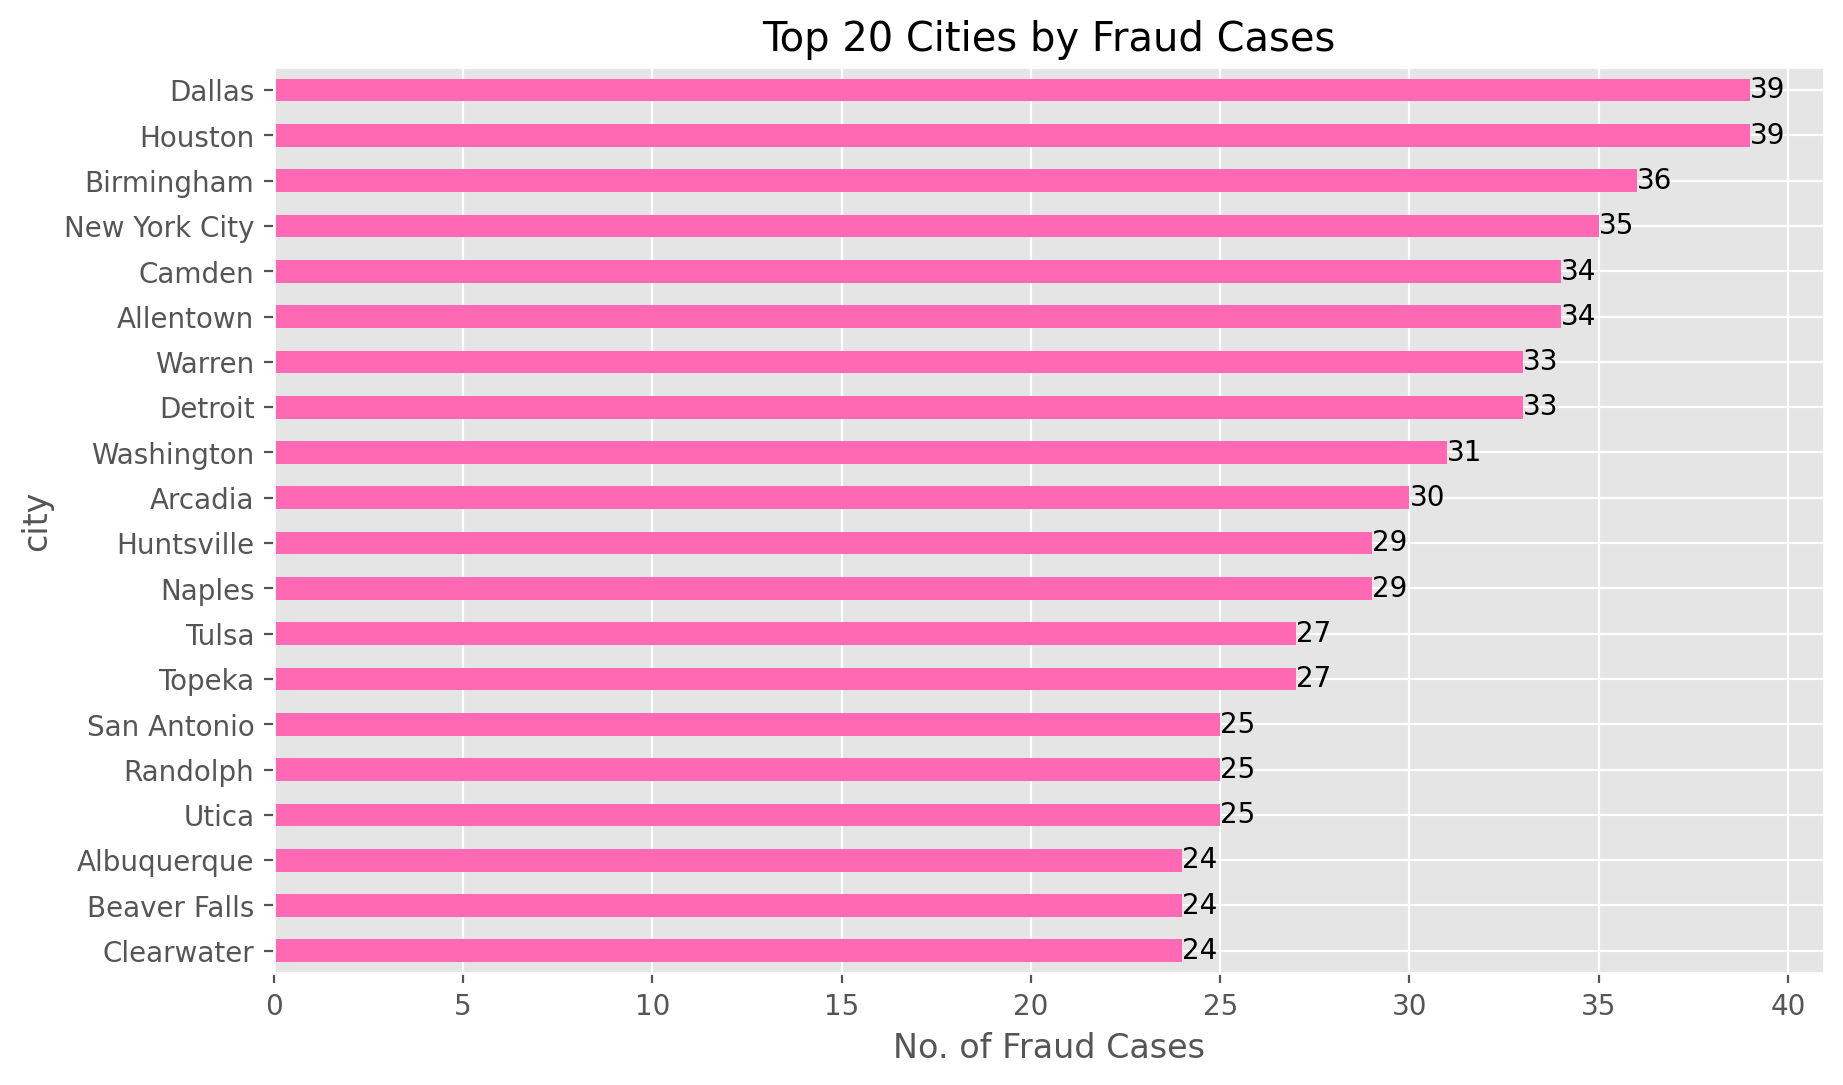

In [27]:
# Fraud by City
fraud_by_city = df[df['is_fraud'] == 1]['city'].value_counts()[:20].sort_values()

plt.figure(figsize = (10,6),dpi = 200)
ax = fraud_by_city.plot(kind = 'barh', xlabel = 'No. of Fraud Cases', ylabel = 'city',
                            title = 'Top 20 Cities by Fraud Cases', color = 'hotpink')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

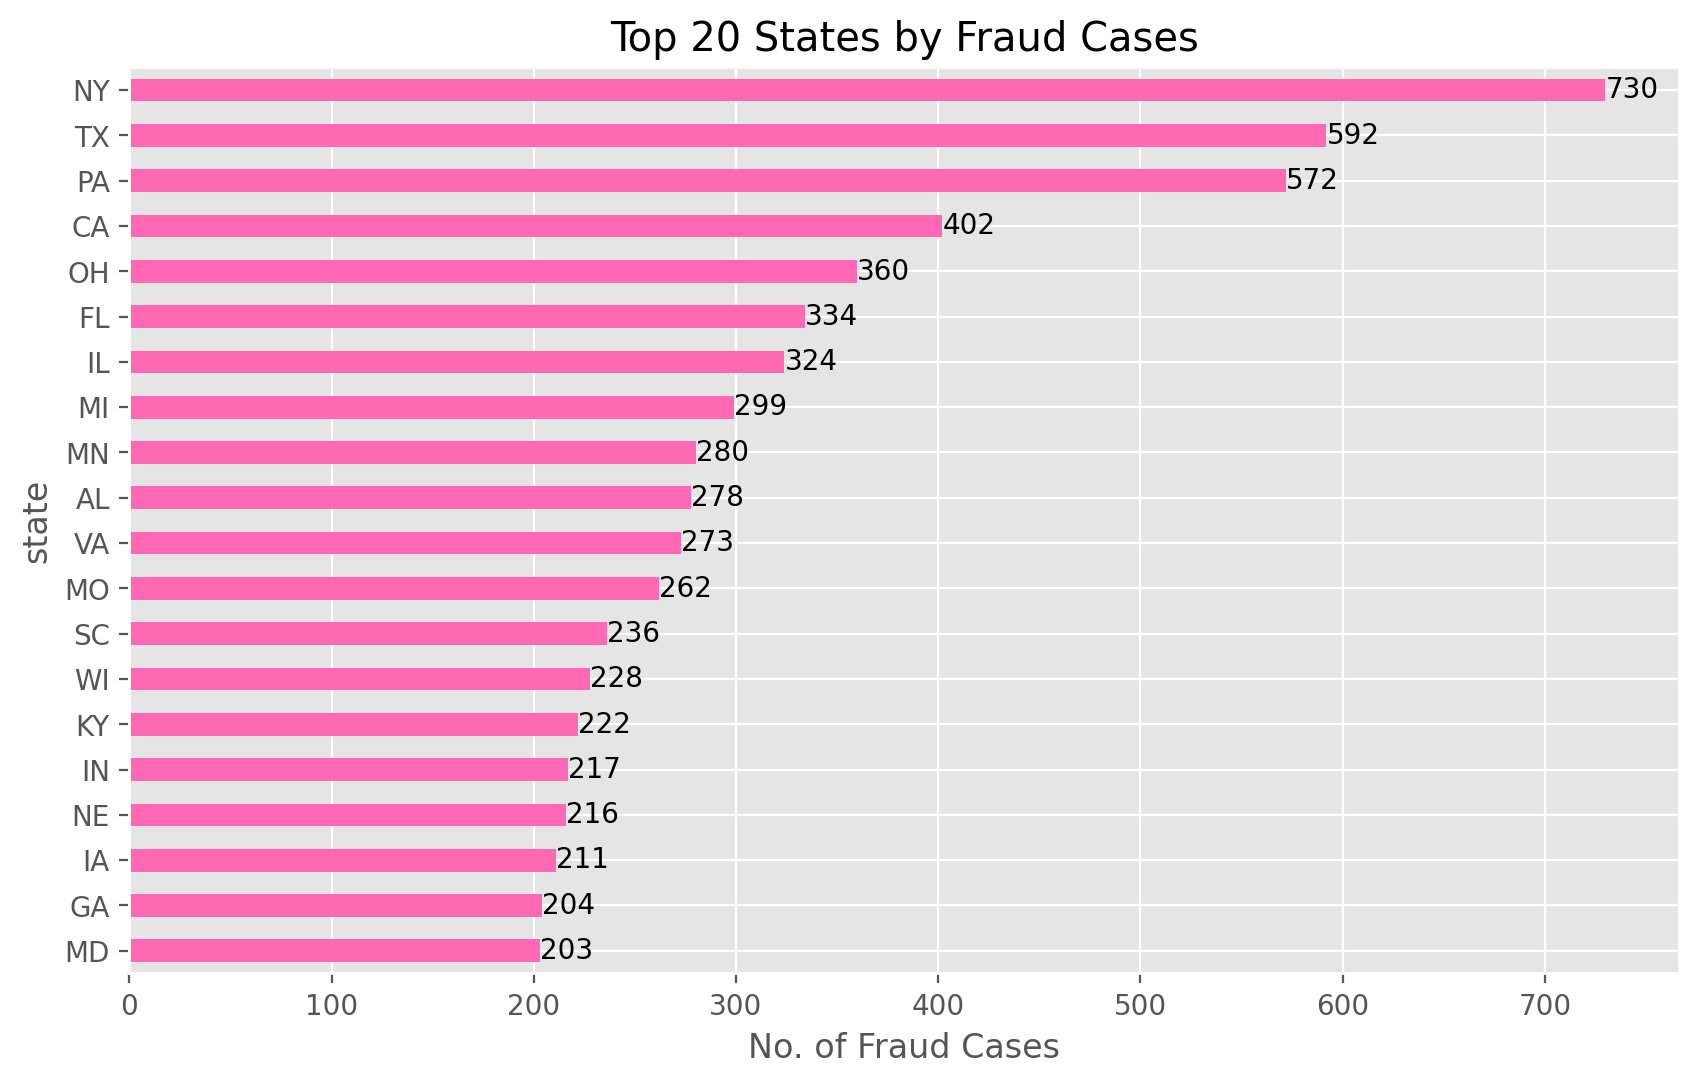

In [28]:
# Fraud by state
fraud_by_state = df[df['is_fraud'] == 1]['state'].value_counts()[:20].sort_values()

plt.figure(figsize = (10,6),dpi = 200)
ax = fraud_by_state.plot(kind = 'barh', xlabel = 'No. of Fraud Cases', ylabel = 'state',
                            title = 'Top 20 States by Fraud Cases', color = 'hotpink')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

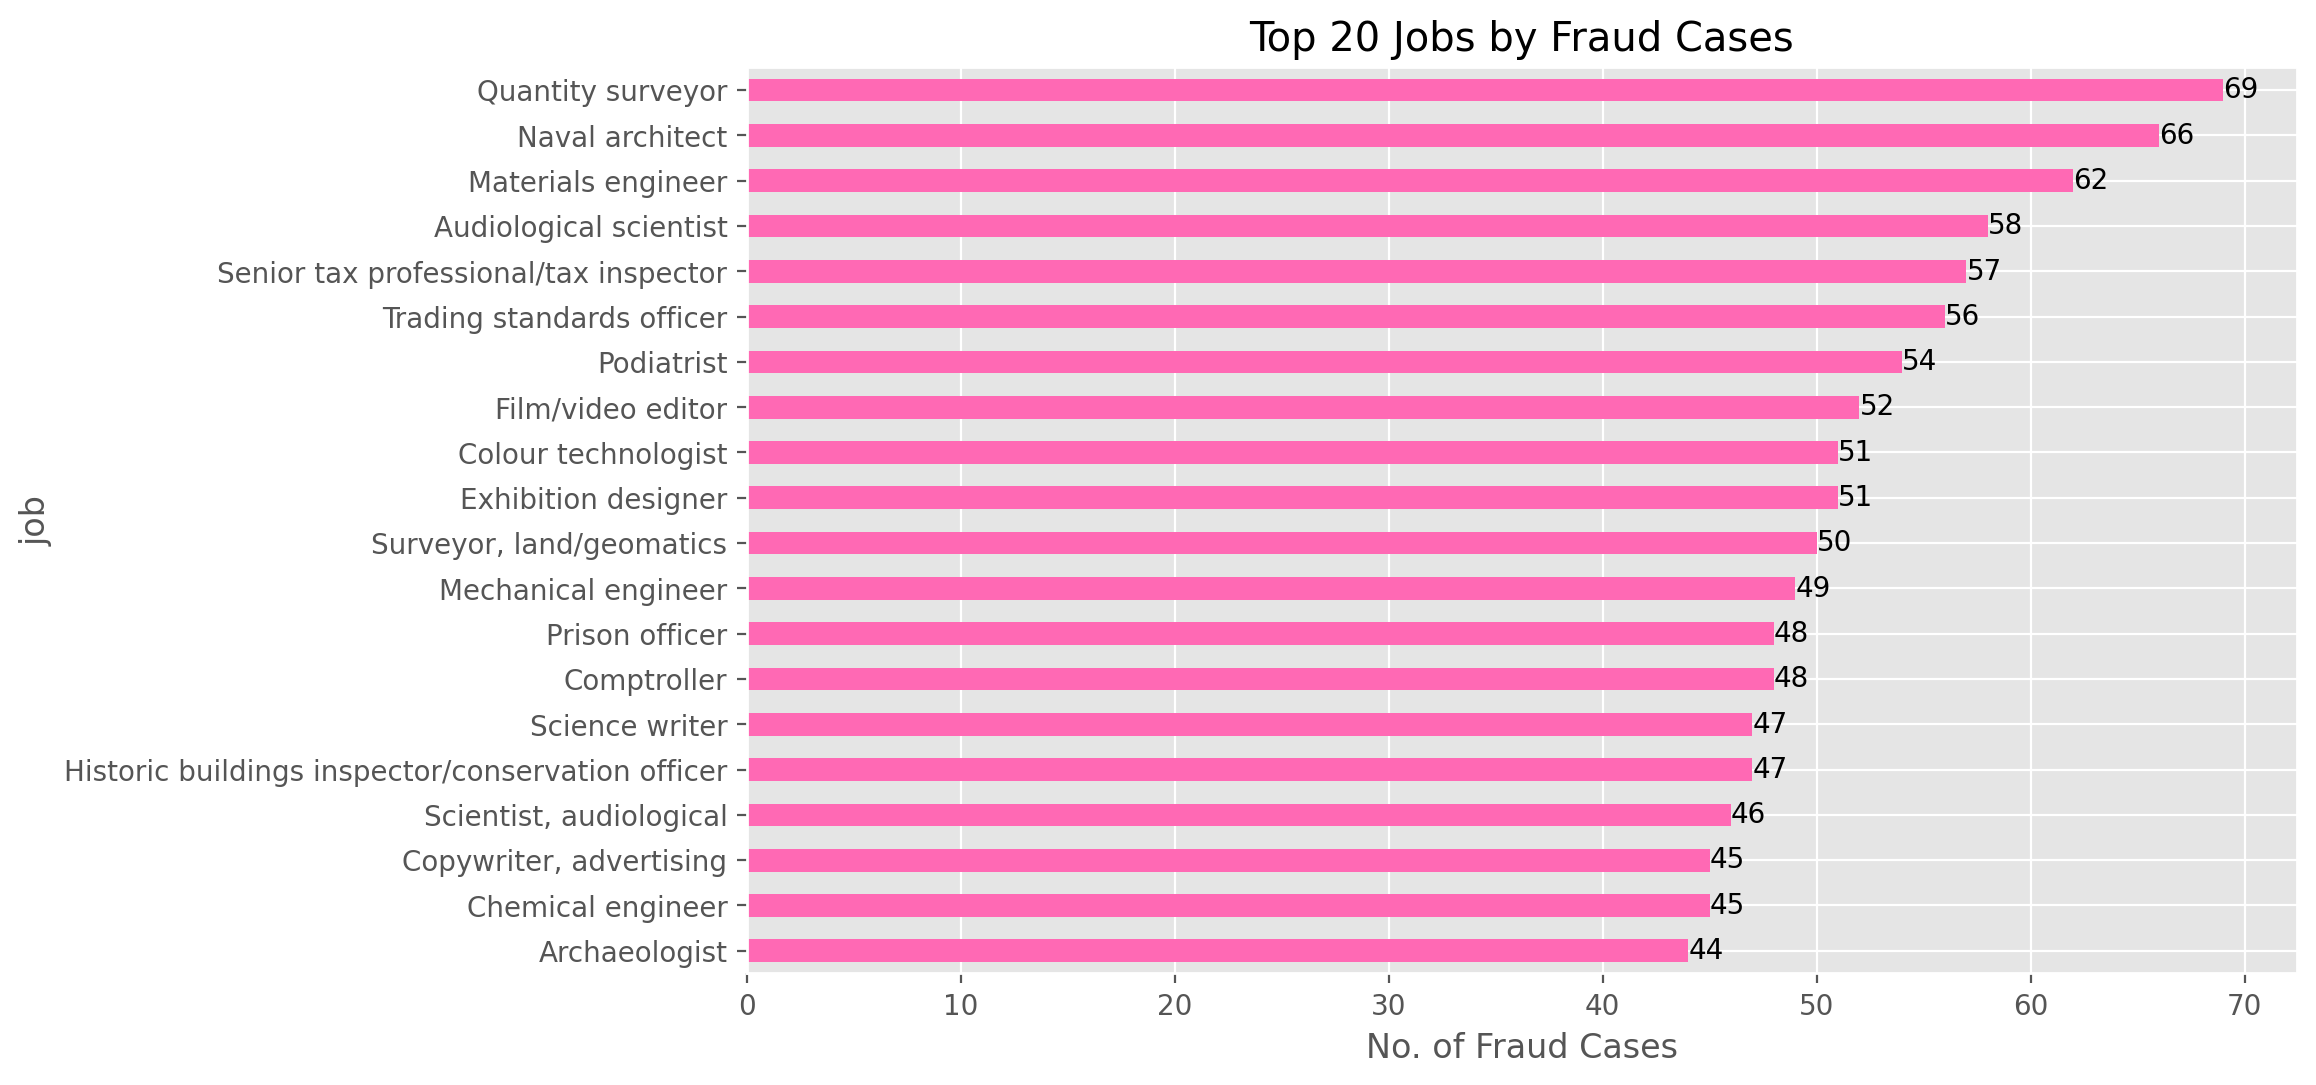

In [29]:
# Fraud by job
fraud_by_job = df[df['is_fraud'] == 1]['job'].value_counts()[:20].sort_values()

plt.figure(figsize = (10,6),dpi = 200)
ax = fraud_by_job.plot(kind = 'barh', xlabel = 'No. of Fraud Cases', ylabel = 'job',
                            title = 'Top 20 Jobs by Fraud Cases', color = 'hotpink')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

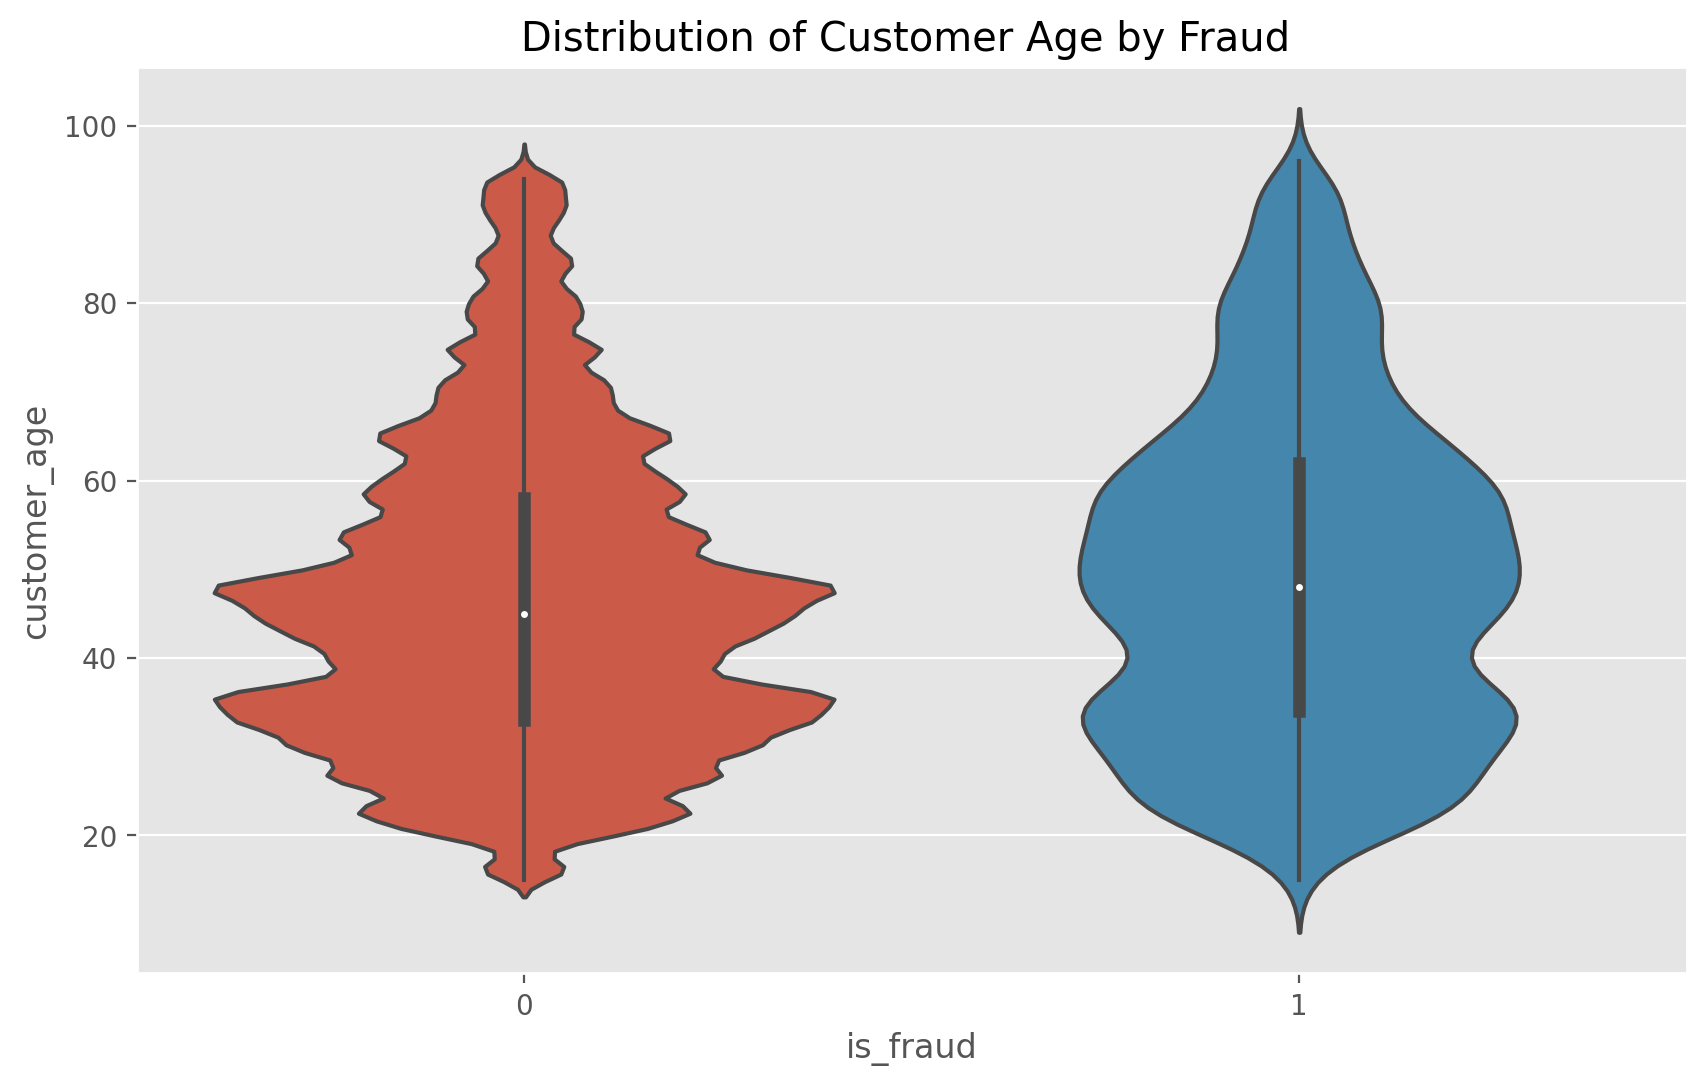

In [30]:
# Fraud by Customer Age
plt.figure(figsize = (10, 6), dpi = 200)
sns.violinplot(df['is_fraud'], df['customer_age'],  data = df)
plt.title('Distribution of Customer Age by Fraud ')
plt.show()

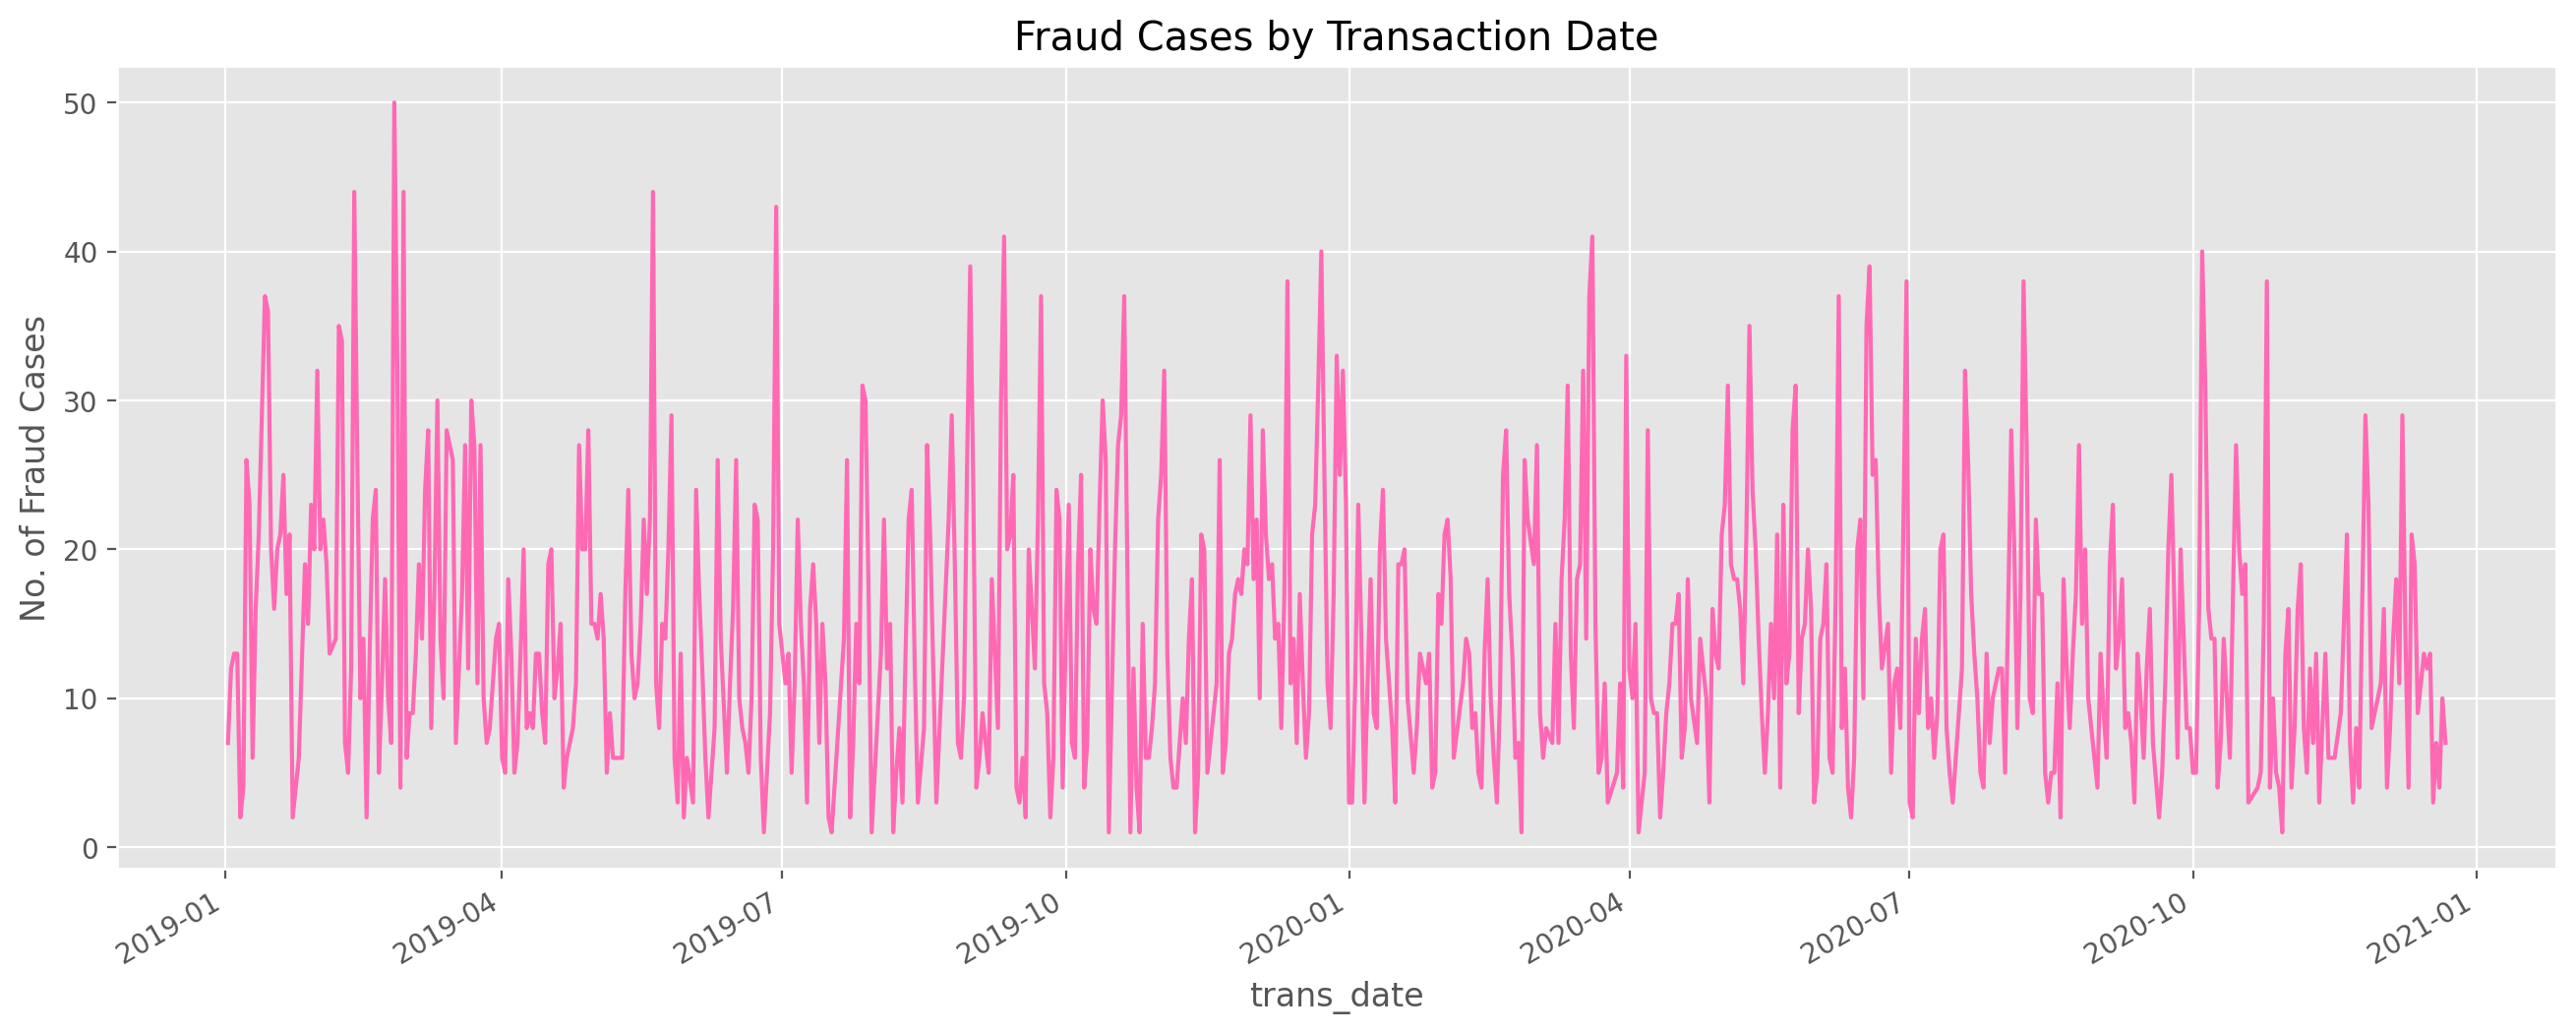

In [31]:
# Fraud Cases by Transaction Date

fraud_by_trans_date = df[df['is_fraud'] == 1]['trans_date'].value_counts().sort_index()

plt.figure(figsize = (16, 6),dpi = 200)
ax = fraud_by_trans_date.plot(kind = 'line', xlabel = 'trans_date', ylabel = 'No. of Fraud Cases',
                            title = 'Fraud Cases by Transaction Date', color = 'hotpink')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

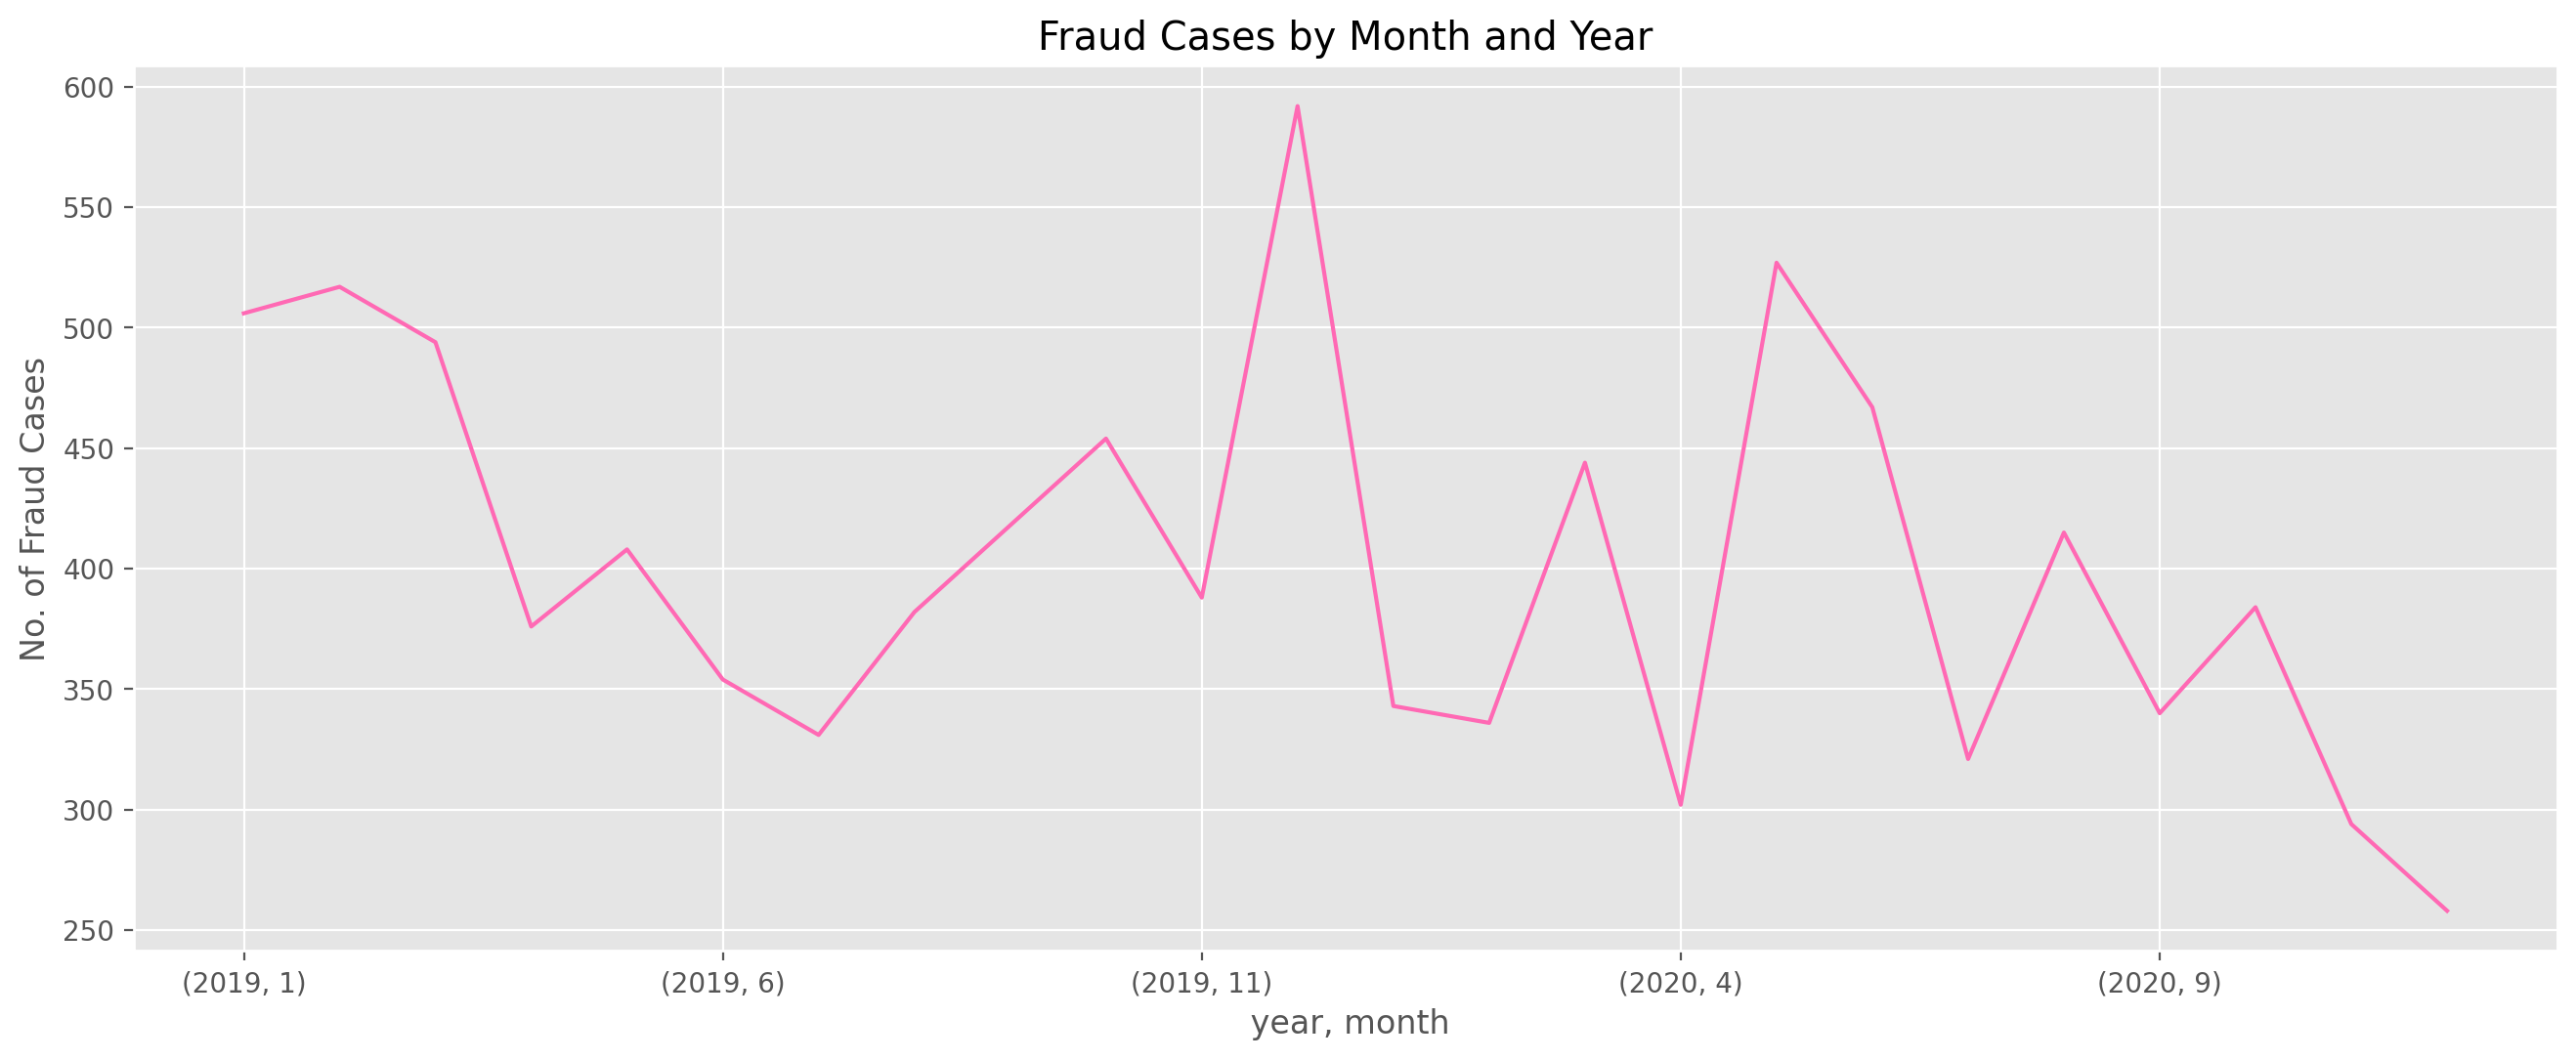

In [32]:
# Fraud Cases by month and year
fraud_by_month_year = df[df['is_fraud'] == 1][['year', 'month']].value_counts().sort_index()

plt.figure(figsize = (16, 6),dpi = 200)
ax = fraud_by_month_year.plot(kind = 'line', xlabel = ' year, month', ylabel = 'No. of Fraud Cases',
                            title = 'Fraud Cases by Month and Year', color = 'hotpink')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

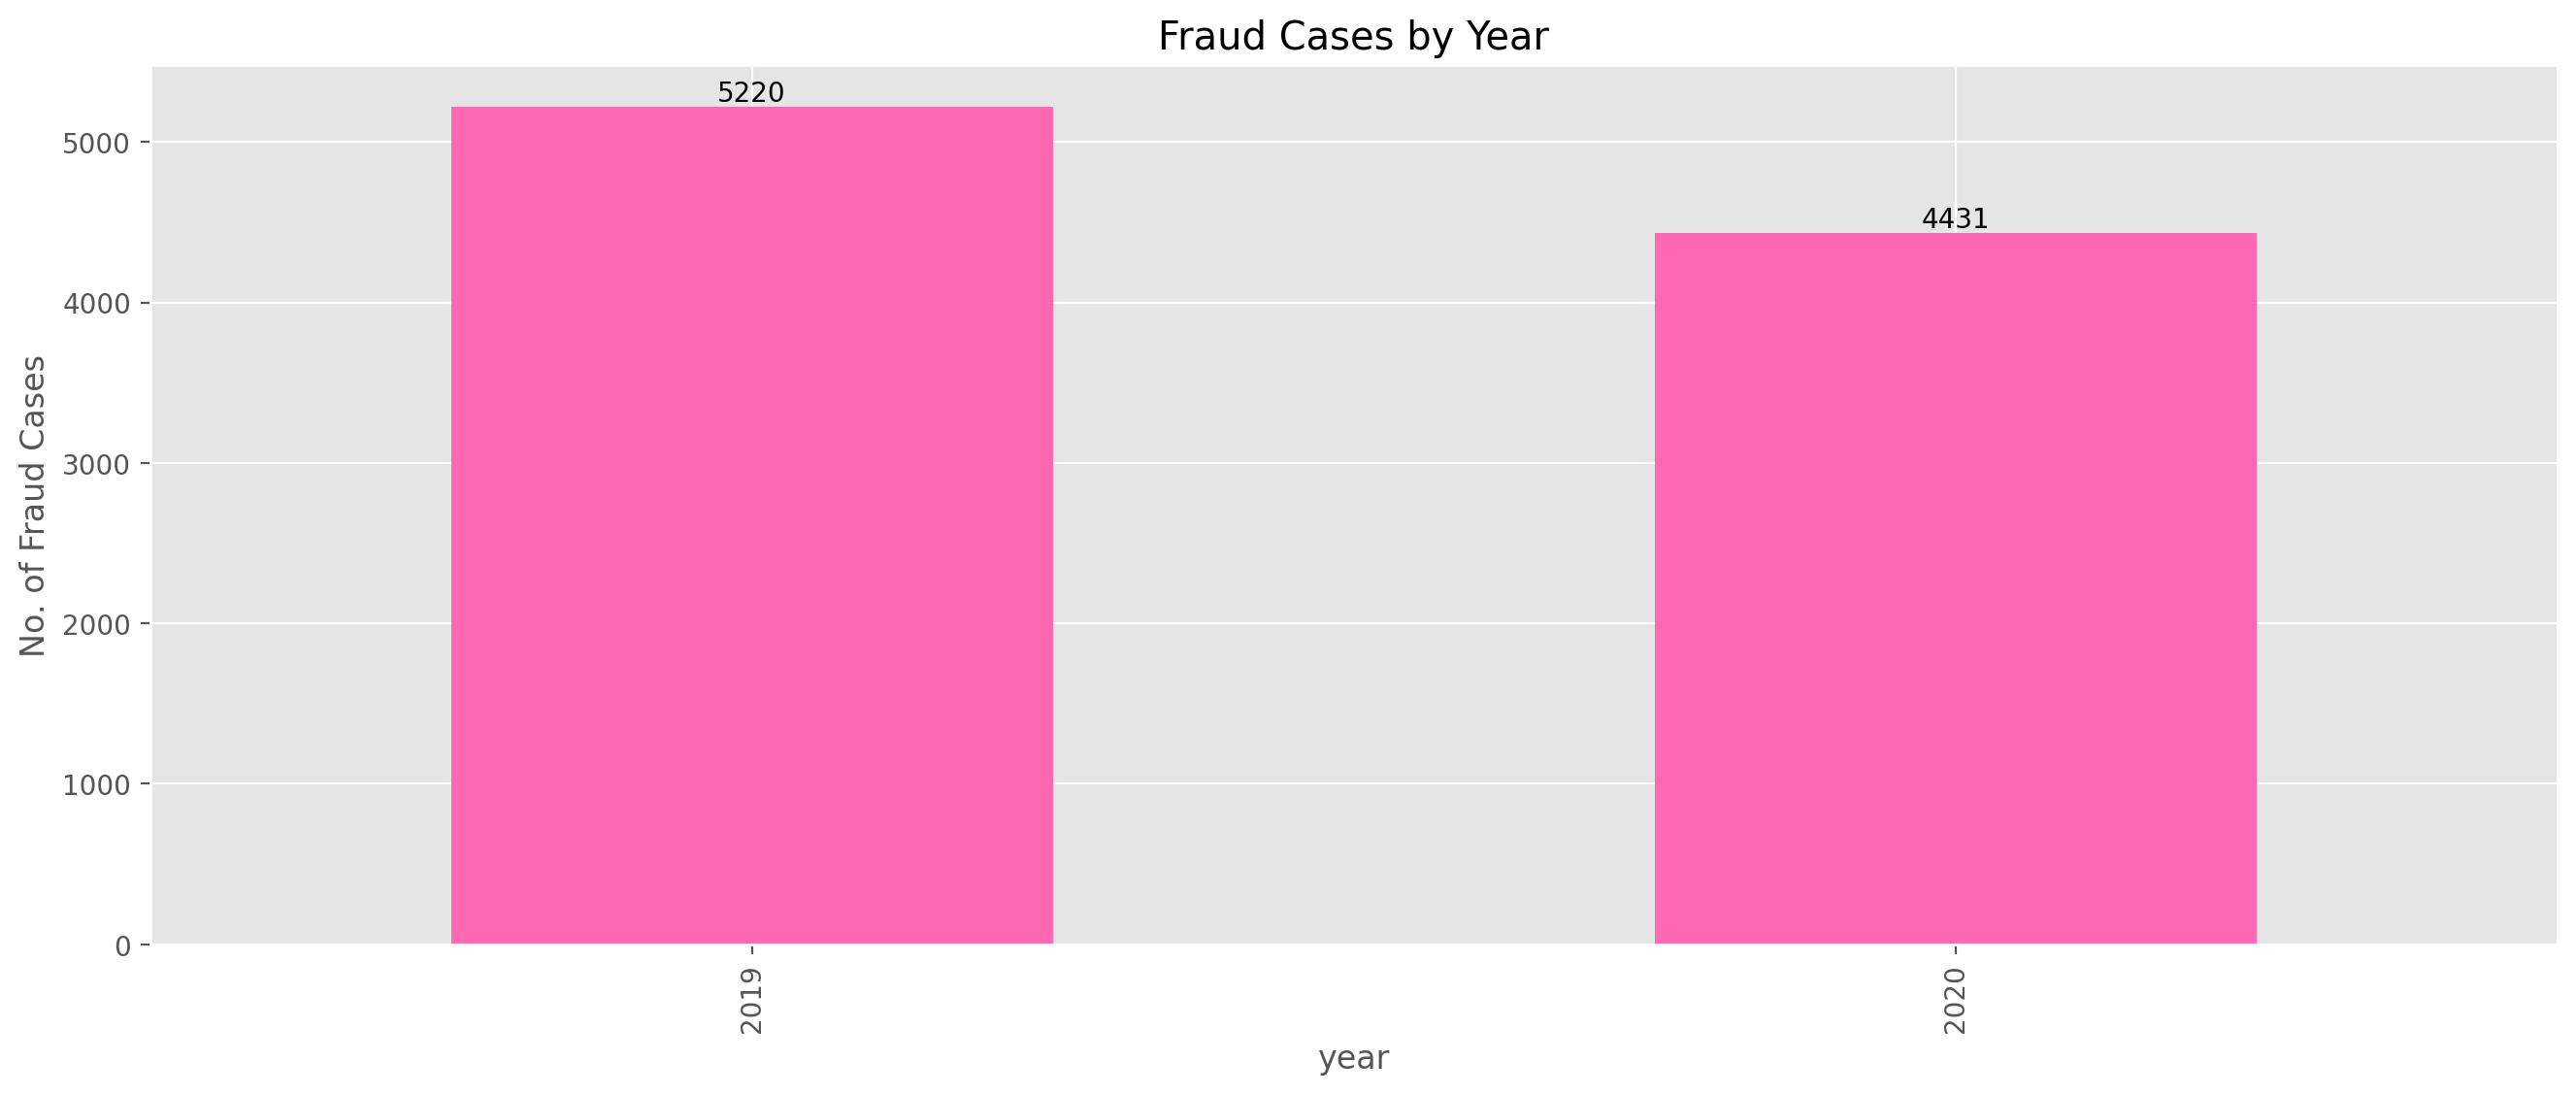

In [33]:
# Fraud Cases by year

fraud_by_year = df[df['is_fraud'] == 1]['year'].value_counts().sort_index()

plt.figure(figsize = (16, 6),dpi = 200)
ax = fraud_by_year.plot(kind = 'bar', xlabel = 'year', ylabel = 'No. of Fraud Cases',
                            title = 'Fraud Cases by Year', color = 'hotpink')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

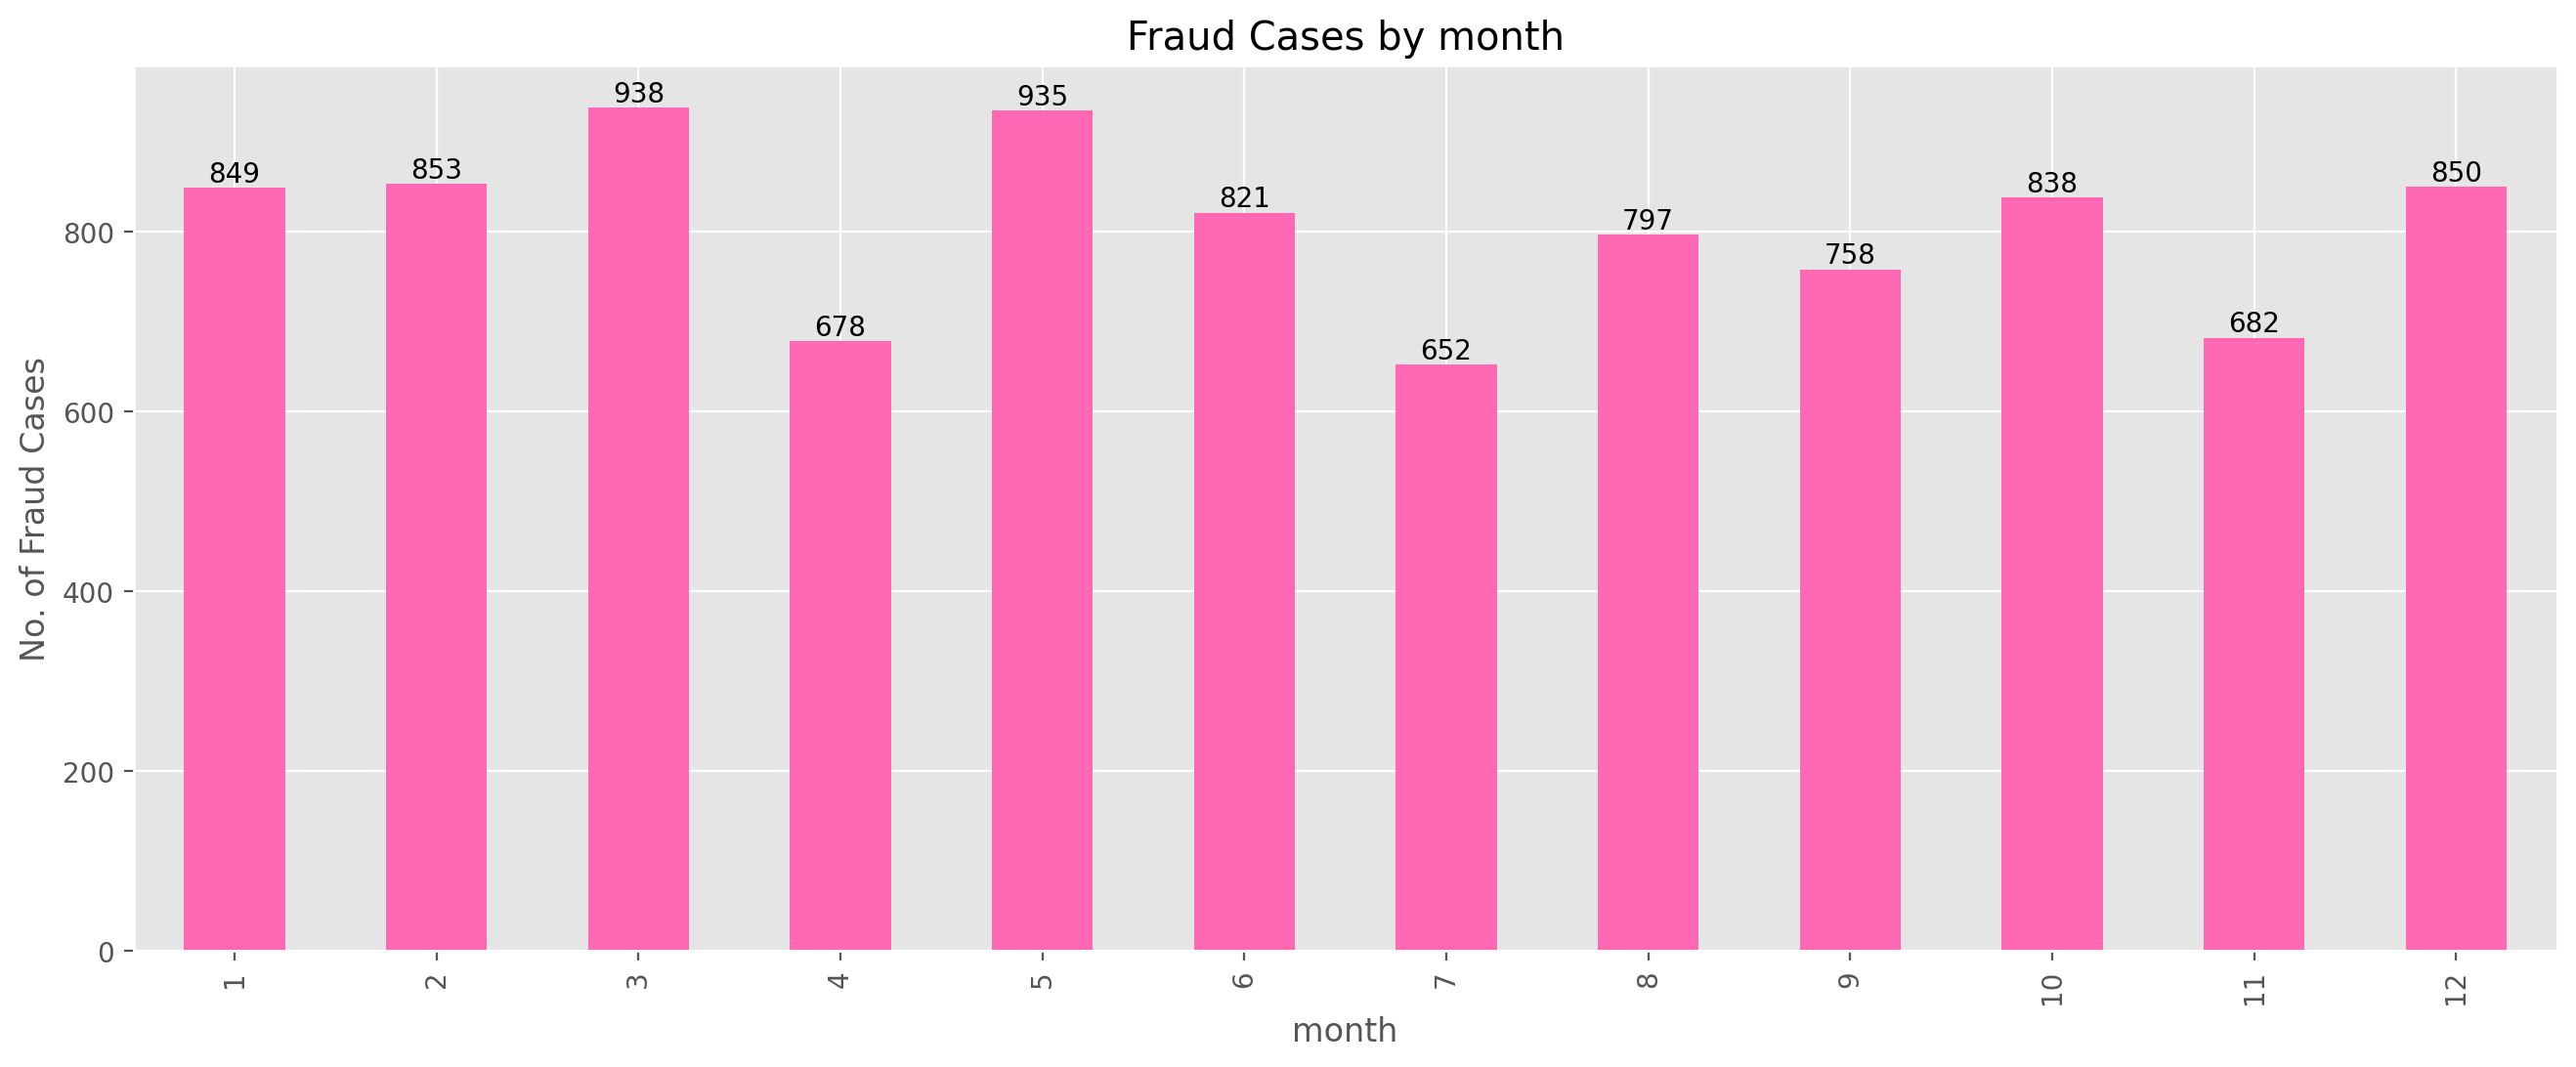

In [34]:
# Fraud Cases by month

fraud_by_month = df[df['is_fraud'] == 1]['month'].value_counts().sort_index()

plt.figure(figsize = (16, 6),dpi = 200)
ax = fraud_by_month.plot(kind = 'bar', xlabel = 'month', ylabel = 'No. of Fraud Cases',
                            title = 'Fraud Cases by month', color = 'hotpink')

for i in ax.containers:
    ax.bar_label(i)
plt.show()

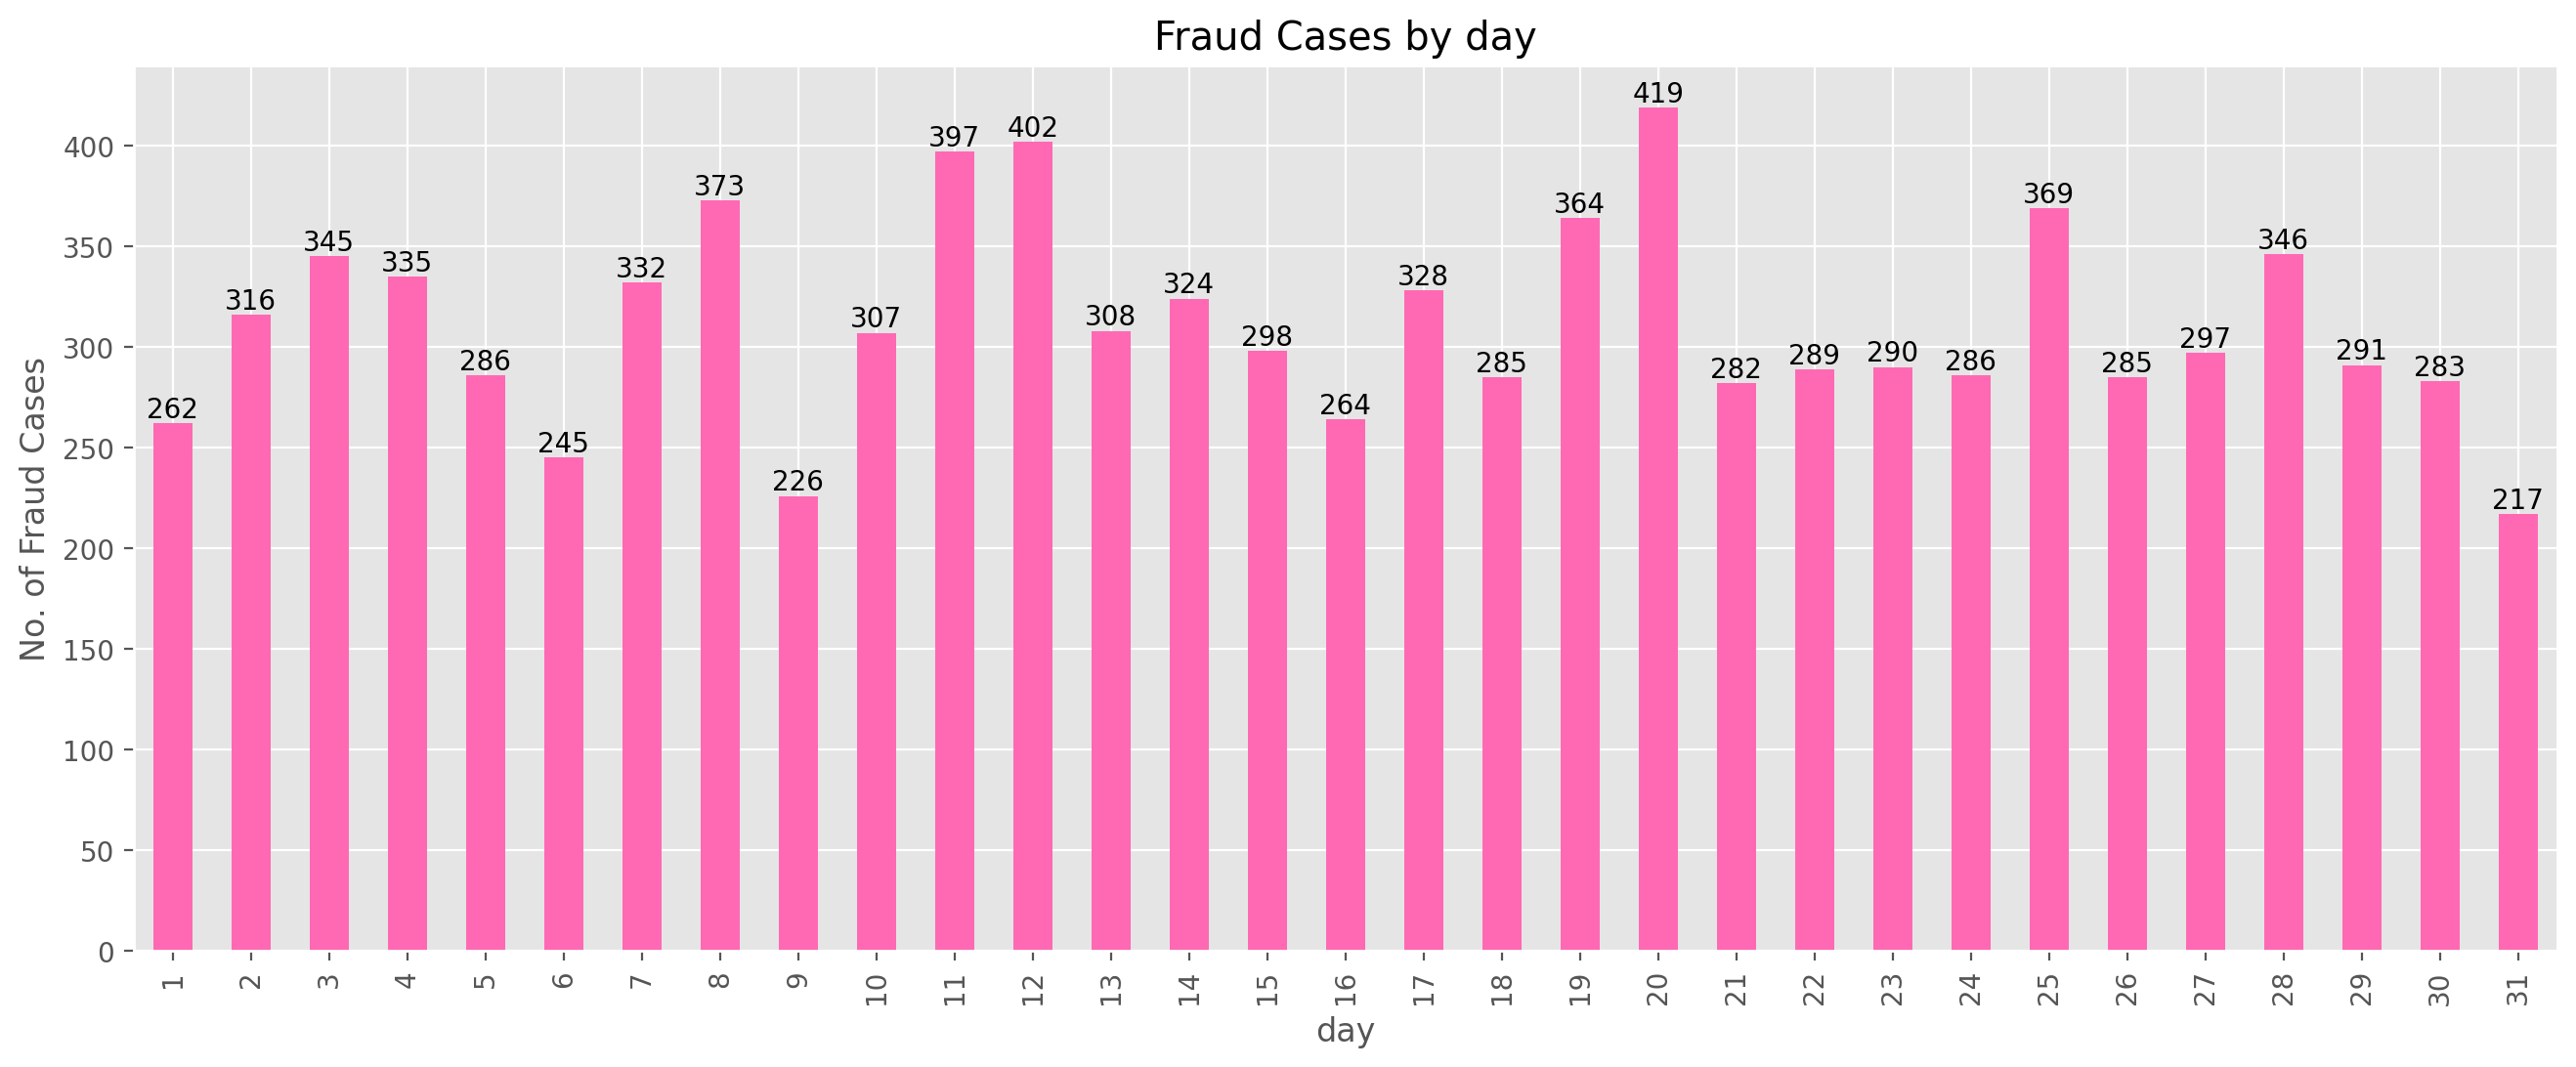

In [35]:
# Fraud Cases by day

fraud_by_day = df[df['is_fraud'] == 1]['day'].value_counts().sort_index()

plt.figure(figsize = (16, 6),dpi = 200)
ax = fraud_by_day.plot(kind = 'bar', xlabel = 'day', ylabel = 'No. of Fraud Cases',
                            title = 'Fraud Cases by day', color = 'hotpink')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [36]:
df.head()

,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,year,month,day,trans_date,customer_age
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,2019,1,1,2019-01-01,32
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,2019,1,1,2019-01-01,42
2,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,2019,1,1,2019-01-01,58
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,2019,1,1,2019-01-01,53
4,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,2019,1,1,2019-01-01,34


In [37]:
# Creating dependent and independent features dataframes
X = df.drop(['is_fraud', 'first', 'last', 'street', 'trans_date'], axis = 1)
Y = df['is_fraud']

In [38]:
X.head()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,year,month,day,customer_age
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,2019,1,1,32
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,2019,1,1,42
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,2019,1,1,58
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,2019,1,1,53
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,2019,1,1,34


In [39]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [40]:
# Encoding the categorical columns in independent features dataset using ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
cols = ['merchant', 'category', 'gender', 'city', 'state', 'job', 'month']
encoder = OrdinalEncoder()
X[cols] = encoder.fit_transform(X[cols])

In [41]:
X.head()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,merch_lat,merch_long,year,month,day,customer_age
0,514.0,8.0,4.97,0.0,532.0,27.0,28654,36.0788,-81.1781,3495,372.0,36.011293,-82.048315,2019,0.0,1,32
1,241.0,4.0,107.23,0.0,619.0,47.0,99160,48.8878,-118.2105,149,431.0,49.159047,-118.186462,2019,0.0,1,42
2,390.0,0.0,220.11,1.0,474.0,13.0,83252,42.1808,-112.2620,4154,308.0,43.150704,-112.154481,2019,0.0,1,58
3,360.0,2.0,45.00,1.0,84.0,26.0,59632,46.2306,-112.1138,1939,330.0,47.034331,-112.561071,2019,0.0,1,53
4,297.0,9.0,41.96,1.0,217.0,45.0,24433,38.4207,-79.4629,99,116.0,38.674999,-78.632459,2019,0.0,1,34


In [42]:
# Scaling the independent features set 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [43]:
Y = df[['is_fraud']].values

In [44]:
print('Independent Features Shape : ' , X.shape)
print('Dependent Features Shape   : ',Y.shape)

Independent Features Shape :  (1852394, 17)
Dependent Features Shape   :  (1852394, 1)


## Resampling
- As the  dependent features dataset is highly unbalanced, we have to use resampling methods

In [45]:
df['is_fraud'].value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

### Under Sampling 

In [46]:
from imblearn.under_sampling import NearMiss
nm_sampler = NearMiss()
x_sampled, y_sampled = nm_sampler.fit_resample(X, Y)

print('Data   : ', x_sampled.shape)
print('Labels : ', y_sampled.shape)

Data   :  (19302, 17)
Labels :  (19302,)


In [47]:
# Splitting the  sampled datasets into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size = 0.2, random_state = 2)

In [48]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (15441, 17)
Training Labels Shape :  (15441,)
Testing Data Shape    :  (3861, 17)
Testing Labels Shape  :  (3861,)


In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [50]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Logistic Regression

Training Set Accuracy : 0.7958681432549706
Testing Set Accuracy  : 0.7943537943537944

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      1888
           1       0.83      0.76      0.79      1973

    accuracy                           0.79      3861
   macro avg       0.80      0.80      0.79      3861
weighted avg       0.80      0.79      0.79      3861



Confusion matrix, without normalization


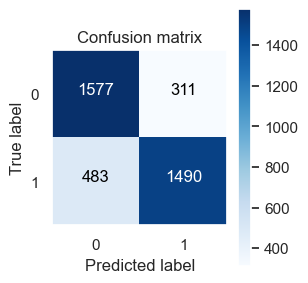

In [51]:
# Using Logistic Regression Classifier 

from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 42)
lr_classifier.fit(x_train, y_train)

lr_pred_train = lr_classifier.predict(x_train)
lr_pred_test = lr_classifier.predict(x_test)

print('Training Set Accuracy :', accuracy_score(y_train, lr_pred_train))
print('Testing Set Accuracy  :', accuracy_score(y_test, lr_pred_test))
print()

print(classification_report(y_test, lr_pred_test))
print()

lr_cm = confusion_matrix(y_test, lr_pred_test)
print()

plt.figure(figsize = (3,3), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(lr_cm, [0, 1])

## KNNeighbors Classifier

Training Set Accuracy : 0.7312997862832719
Testing Set Accuracy  : 0.5734265734265734

              precision    recall  f1-score   support

           0       0.54      0.79      0.64      1888
           1       0.65      0.37      0.47      1973

    accuracy                           0.57      3861
   macro avg       0.59      0.58      0.56      3861
weighted avg       0.60      0.57      0.55      3861



Confusion matrix, without normalization


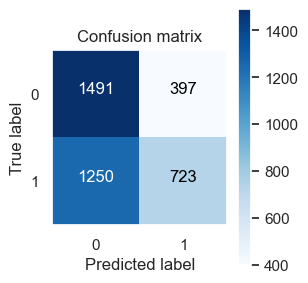

In [52]:
from sklearn.neighbors import KNeighborsClassifier
kn_classifier = KNeighborsClassifier(n_neighbors = 4)
kn_classifier.fit(x_train, y_train)

kn_pred_train = kn_classifier.predict(x_train)
kn_pred_test = kn_classifier.predict(x_test)

print('Training Set Accuracy :', accuracy_score(y_train, kn_pred_train))
print('Testing Set Accuracy  :', accuracy_score(y_test, kn_pred_test))
print()

print(classification_report(y_test, kn_pred_test))
print()

kn_cm = confusion_matrix(y_test, kn_pred_test)
print()

plt.figure(figsize = (3,3), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(kn_cm, [0, 1])

## Decision Tree Clasification

Training Set Accuracy : 1.0
Testing Set Accuracy  : 0.9608909608909609

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1888
           1       0.96      0.96      0.96      1973

    accuracy                           0.96      3861
   macro avg       0.96      0.96      0.96      3861
weighted avg       0.96      0.96      0.96      3861



Confusion matrix, without normalization


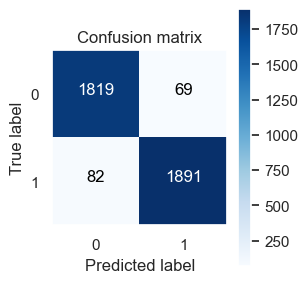

In [53]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_depth = 500, random_state = 42)
dt_classifier.fit(x_train, y_train)

dt_pred_train = dt_classifier.predict(x_train)
dt_pred_test = dt_classifier.predict(x_test)

print('Training Set Accuracy :', accuracy_score(y_train, dt_pred_train))
print('Testing Set Accuracy  :', accuracy_score(y_test, dt_pred_test))
print()

print(classification_report(y_test, dt_pred_test))
print()

dt_cm = confusion_matrix(y_test, dt_pred_test)
print()

plt.figure(figsize = (3,3), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(dt_cm, [0, 1])

### Random Forest Classification

Training Set Accuracy : 1.0
Testing Set Accuracy  : 0.9551929551929552

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1888
           1       0.97      0.94      0.96      1973

    accuracy                           0.96      3861
   macro avg       0.96      0.96      0.96      3861
weighted avg       0.96      0.96      0.96      3861



Confusion matrix, without normalization


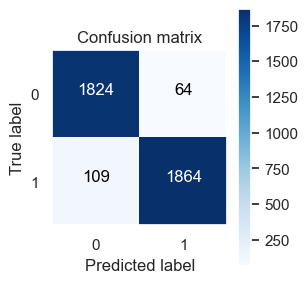

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 100, max_depth = 1000, random_state = 42)
rf_classifier.fit(x_train, y_train)

rf_pred_train = rf_classifier.predict(x_train)
rf_pred_test = rf_classifier.predict(x_test)

print('Training Set Accuracy :', accuracy_score(y_train, rf_pred_train))
print('Testing Set Accuracy  :', accuracy_score(y_test, rf_pred_test))
print()

print(classification_report(y_test, rf_pred_test))
print()

rf_cm = confusion_matrix(y_test, rf_pred_test)
print()

plt.figure(figsize = (3,3), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(rf_cm, [0, 1])

## XGBoost Classifier

Training Set Accuracy : 1.0
Testing Set Accuracy  : 0.9702149702149702

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1888
           1       0.97      0.98      0.97      1973

    accuracy                           0.97      3861
   macro avg       0.97      0.97      0.97      3861
weighted avg       0.97      0.97      0.97      3861



Confusion matrix, without normalization


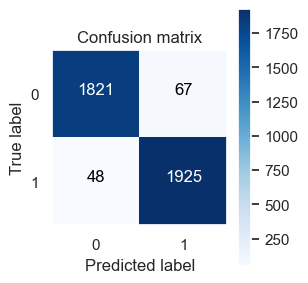

In [55]:
from xgboost import XGBClassifier
xg_classifier = XGBClassifier(n_estimators = 500, max_depth = 1000, learning_rate = 0.05, random_state = 42)
xg_classifier.fit(x_train, y_train)

xg_pred_train = xg_classifier.predict(x_train)
xg_pred_test = xg_classifier.predict(x_test)

print('Training Set Accuracy :', accuracy_score(y_train, xg_pred_train))
print('Testing Set Accuracy  :', accuracy_score(y_test, xg_pred_test))
print()

print(classification_report(y_test, xg_pred_test))
print()

xg_cm = confusion_matrix(y_test, xg_pred_test)
print()

plt.figure(figsize = (3,3), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(xg_cm, [0, 1])

## LightGBM 

Training Set Accuracy : 0.9910627550029143
Testing Set Accuracy  : 0.972027972027972

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1888
           1       0.97      0.98      0.97      1973

    accuracy                           0.97      3861
   macro avg       0.97      0.97      0.97      3861
weighted avg       0.97      0.97      0.97      3861



Confusion matrix, without normalization


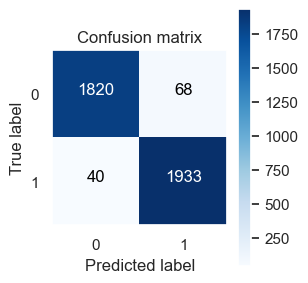

In [56]:
from lightgbm import LGBMClassifier
lg_classifier = LGBMClassifier(n_estimators = 100, max_depth = 500, random_state = 42)
lg_classifier.fit(x_train, y_train)

lg_pred_train = lg_classifier.predict(x_train)
lg_pred_test = lg_classifier.predict(x_test)

print('Training Set Accuracy :', accuracy_score(y_train, lg_pred_train))
print('Testing Set Accuracy  :', accuracy_score(y_test, lg_pred_test))
print()

print(classification_report(y_test, lg_pred_test))
print()

lg_cm = confusion_matrix(y_test, lg_pred_test)
print()

plt.figure(figsize = (3,3), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(lg_cm, [0, 1])

## Adaboost

Training Set Accuracy : 1.0
Testing Set Accuracy  : 0.9531209531209531

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1888
           1       0.96      0.94      0.95      1973

    accuracy                           0.95      3861
   macro avg       0.95      0.95      0.95      3861
weighted avg       0.95      0.95      0.95      3861



Confusion matrix, without normalization


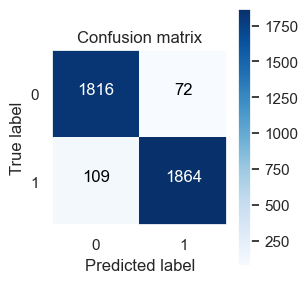

In [57]:
estimator = RandomForestClassifier(n_estimators = 100, max_depth = 100, random_state = 42)

from sklearn.ensemble import AdaBoostClassifier
ad_classifier = AdaBoostClassifier(estimator, n_estimators = 500)
ad_classifier.fit(x_train, y_train)

ad_pred_train = ad_classifier.predict(x_train)
ad_pred_test = ad_classifier.predict(x_test)

print('Training Set Accuracy :', accuracy_score(y_train, ad_pred_train))
print('Testing Set Accuracy  :', accuracy_score(y_test, ad_pred_test))
print()

print(classification_report(y_test, ad_pred_test))
print()

ad_cm = confusion_matrix(y_test, ad_pred_test)
print()

plt.figure(figsize = (3,3), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(ad_cm, [0, 1])

## Stacking Ensemble

In [58]:
from sklearn.ensemble import VotingClassifier
vt_classifier = VotingClassifier(estimators = [('lr', lr_classifier),
                                               ('dt', dt_classifier),
                                               ('rf', rf_classifier),
                                               ('xg', xg_classifier),
                                               ('lg', lg_classifier),
                                               ('ad', ad_classifier)],
                                                voting = 'hard')

vt_classifier.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=500,
                                                     random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=1000,
                                                     random_state=42)),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=No...
                                            max_delta_step=None, max_depth=1000,
                                            max

Training Set Accuracy : 1.0
Testing Set Accuracy  : 0.9627039627039627

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1888
           1       0.98      0.95      0.96      1973

    accuracy                           0.96      3861
   macro avg       0.96      0.96      0.96      3861
weighted avg       0.96      0.96      0.96      3861



Confusion matrix, without normalization


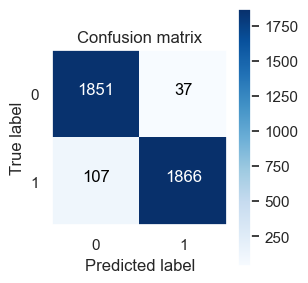

In [59]:
vt_pred_train = vt_classifier.predict(x_train)
vt_pred_test = vt_classifier.predict(x_test)

print('Training Set Accuracy :', accuracy_score(y_train, vt_pred_train))
print('Testing Set Accuracy  :', accuracy_score(y_test, vt_pred_test))
print()

print(classification_report(y_test, vt_pred_test))
print()

vt_cm = confusion_matrix(y_test, vt_pred_test)
print()

plt.figure(figsize = (3,3), dpi = 100)
sns.set(rc = {'axes.grid' : False})
plot_confusion_matrix(vt_cm, [0, 1])

### As Light GBM classifier is giving the best results it can be used as a final model for classsification 